# Credit EDA Assignment

In [102]:
#let's import some important libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#To ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Reading 'application data'
application_df=pd.read_csv("application_data.csv")
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Reading 'previous application data'
previous_app_df=pd.read_csv("previous_application (1).csv")
previous_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Total rows and column of application data
application_df.shape

(307511, 122)

In [7]:
#Total rows and column of 'previous application data'
previous_app_df.shape

(1670214, 37)

# Data cleaning of application_df

In [8]:
# Describing application_df dataset
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
#checking the null values
df_null=application_df.isnull().sum()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
#converting the null values into percentage
df_app_percent=round((100*application_df.isnull().sum()/len(application_df)),2)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_app_percent

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
application_df.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [12]:
#Removing null values more than 19%
application_df = application_df.loc[:,application_df.isnull().mean()<= .19]

In [13]:
#number of column left after removing the null values that are <=19%
len(application_df.columns)

71

In [14]:
#rechecking the data
df_app_percent=round((100*application_df.isnull().sum()/len(application_df)),2)
df_app_percent

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

# Data Cleaning Of The Previous_apllication dataset

In [15]:
#checking the null values 
df_prev_null=previous_app_df.isnull().sum()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_prev_null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [16]:
#converting the null values to percentage
df_prev_percent=round((100*previous_app_df.isnull().sum()/len(previous_app_df)),2)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_prev_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [17]:
#Removing the null values more than 20%
df_prev= previous_app_df.loc[:,previous_app_df.isnull().mean()<=.20]

In [18]:
#Number of column left after removal of null values
len(df_prev.columns)

23

In [19]:
df_prev_percent=round((100*df_prev.isnull().sum()/len(df_prev)),2)
df_prev_percent

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

# imputing the missing values in the application dataset

In [20]:
application_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [21]:
# checking the mode value in the Name_Type_suite column
application_df['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [22]:
# filling Name_Type_suite column with mode value("unaccompanied")i.e most occured value.
application_df['NAME_TYPE_SUITE'].fillna(value='unaccompanied',inplace= True)

# Imputing The Missing Values With The Numerical Column

In [23]:
#checking the mean value in AMT_REQ_CREDIT_BEAURO_HOUR COLUMN
application_df.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006402448193930645

In [24]:
#Filing the AMT_REQ_CREDIT_BEAURO_HOUR,AMT_REQ_CREDIT_BEAURO_DAY,AMT_REQ_CREDIT_BEAURO_WEEK,AMT_REQ_CREDIT_BEAURO_MON,AMT_REQ_CREDIT_BEAURO_QRT
#AMT_REQ_CREDIT_BEAURO_YEAR with "0" because most of the values in the column are "0"

application_df.loc[:'AMT_REQ_CREDIT_BUREAU_HOUR':,'AMT_REQ_CREDIT_BUREAU_YEAR'] = application_df.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [25]:
#checking the AMT_Goods_Price column
application_df.AMT_GOODS_PRICE.mean()


538396.2074288895

In [26]:
#imputing the mean value of AMT_GOODS_PRICE 
application_df['AMT_GOODS_PRICE'].fillna(application_df.AMT_GOODS_PRICE.mean(),inplace=True)

In [27]:
#Replacing the null values with median because AMT_ANNUITY column have outilers which may affect the analysis

application_df['AMT_ANNUITY'].fillna(application_df.AMT_ANNUITY.median(),inplace=True)

In [28]:
#Rechecking the null values of application_dataset 
round((100 * application_df.isnull().sum()/len(application_df)) , 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

# checking the data type of the column 

In [29]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [30]:
#some column have data types float it should be converted to int
application_df['DAYS_REGISTRATION']=application_df['DAYS_REGISTRATION'].astype(int,errors='ignore')
application_df['CNT_FAM_MEMBERS']=application_df['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
application_df['OBS_30_CNT_SOCIAL_CIRCLE'] = application_df['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
application_df['DEF_30_CNT_SOCIAL_CIRCLE'] = application_df['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
application_df['OBS_60_CNT_SOCIAL_CIRCLE'] = application_df['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
application_df['DEF_60_CNT_SOCIAL_CIRCLE'] = application_df['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
application_df['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_df['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors='ignore')
application_df['AMT_REQ_CREDIT_BUREAU_DAY'] = application_df['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int, errors='ignore')
application_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_df['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int, errors='ignore')
application_df['AMT_REQ_CREDIT_BUREAU_MON'] = application_df['AMT_REQ_CREDIT_BUREAU_MON'].astype(int, errors='ignore')
application_df['AMT_REQ_CREDIT_BUREAU_QRT']  = application_df['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int, errors='ignore')
application_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_df['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int, errors='ignore')

# Removing Unecessary Columns From The Application Dataset

In [31]:
unnecessary=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
              'REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
              'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
             'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
             'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_DOCUMENT_18']



application_df.drop(labels=unnecessary,axis=1,inplace=True)










In [32]:
#checking the gender and organizion coloumn 
application_df.CODE_GENDER.value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [33]:
#Replacing the "XNA" values with Females as females are most occured values
application_df.CODE_GENDER.replace(to_replace='XNA', value= "F", inplace= True)

In [34]:
#rechecking the gender column
application_df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

application_df.ORGANIZATION_TYPE.value_counts()

# Creating Bins for 'AMT_Income_Total' and 'AMT_Credit'


In [35]:
# Creating Bins for 'AMT_Income_Total'
bins_income=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,550000]
slot_income=['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000','200000-225000',
             '225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000','375000-400000',
             '400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_df['AMT_INCOME_RANGE']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins_income,labels=slot_income)


In [36]:
#credit bins for the credit column i.e 'AMT_CREDIT
bins_credit=[0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000]
slot_credit=['0-150000','150000-200000','200000-2500000','250000-300000','300000-350000','350000-400000','400000-450000',
             '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000',
             '750000-800000','800000-850000','850000-900000','900000 and above']
application_df['AMT_CREDIT_RANGE']=pd.cut(application_df['AMT_CREDIT'],bins_credit,labels=slot_credit)


# Checking The Imbalance Ratio

In [37]:
# lets check the target data
application_df.TARGET.value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

### Here TARGET=0 means the people those are not defaulter
### And, TARGET= 1 means the people those are defaulter

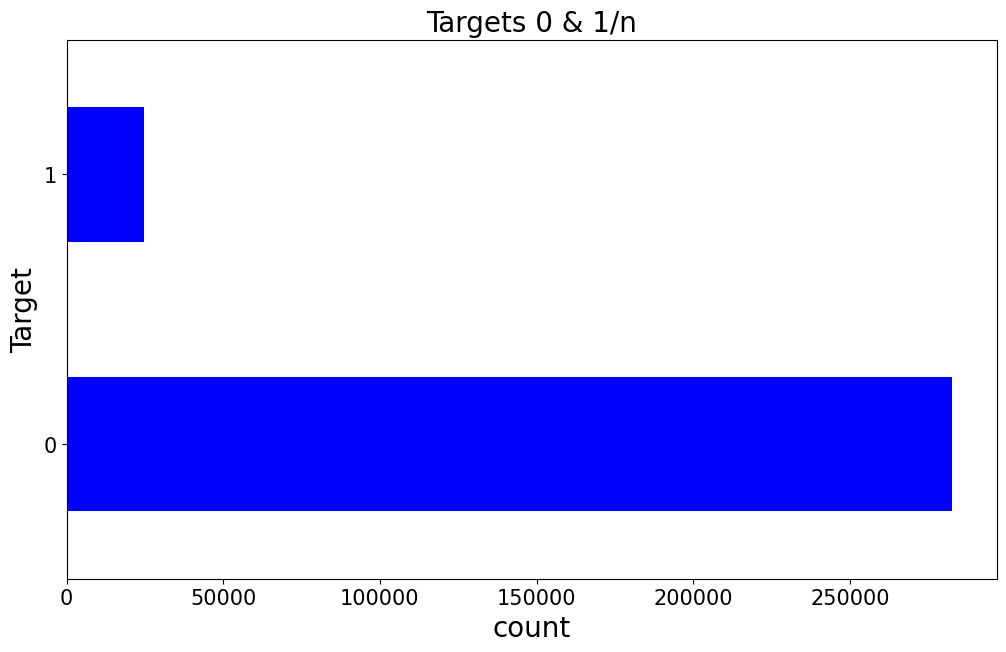

In [38]:
# plotting the targets
plt.figure(figsize=[12,7])
application_df.TARGET.value_counts().plot.barh(color='blue')
plt.title('Targets 0 & 1/n',fontsize=20)
plt.xlabel('count',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [39]:
#checking the imbalance ratio for the target column
target_0=application_df.loc[application_df['TARGET']==0]
target_1=application_df.loc[application_df['TARGET']==1]
round(len(target_0)/len(target_1),2)

11.39

## Univariate Analysis

##### Plotting bar chart for TARGET= 1i.e people having  difficulty to pay loans

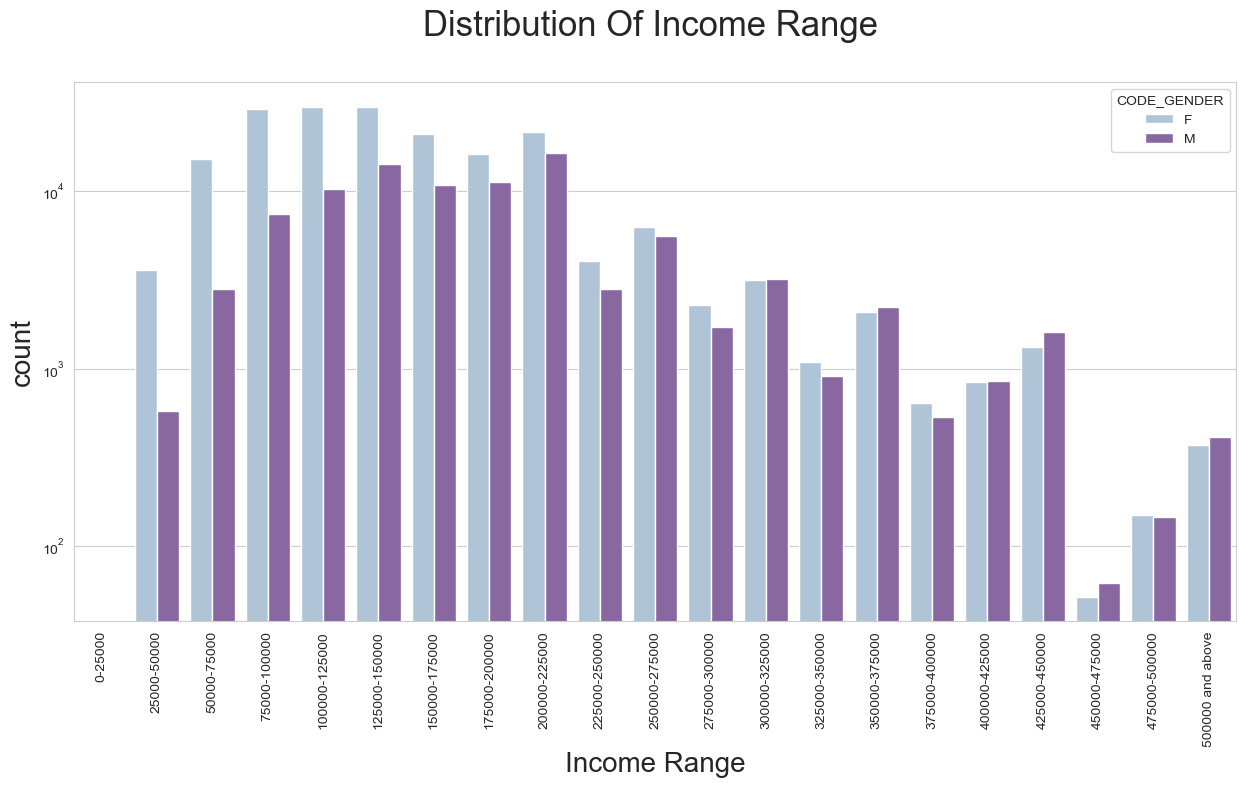

In [84]:
#Plotting for income Rnage across various gender
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_0,x='AMT_INCOME_RANGE',hue='CODE_GENDER',palette='BuPu')
plt.xticks(rotation=90)
plt.title('Distribution Of Income Range \n',fontsize=25)
plt.xlabel('Income Range',fontsize=20)
plt.ylabel('count',fontsize= 20)
plt.yscale('log')
plt.show()


### Insights From The Graph:
#### 1) Maximum Credit Belong to Income Range 750000 to 225000
#### 2) Very less count for the range 450000 to 4750000
#### 3) it seems that most of the female have more credit distrubution as compared to the males

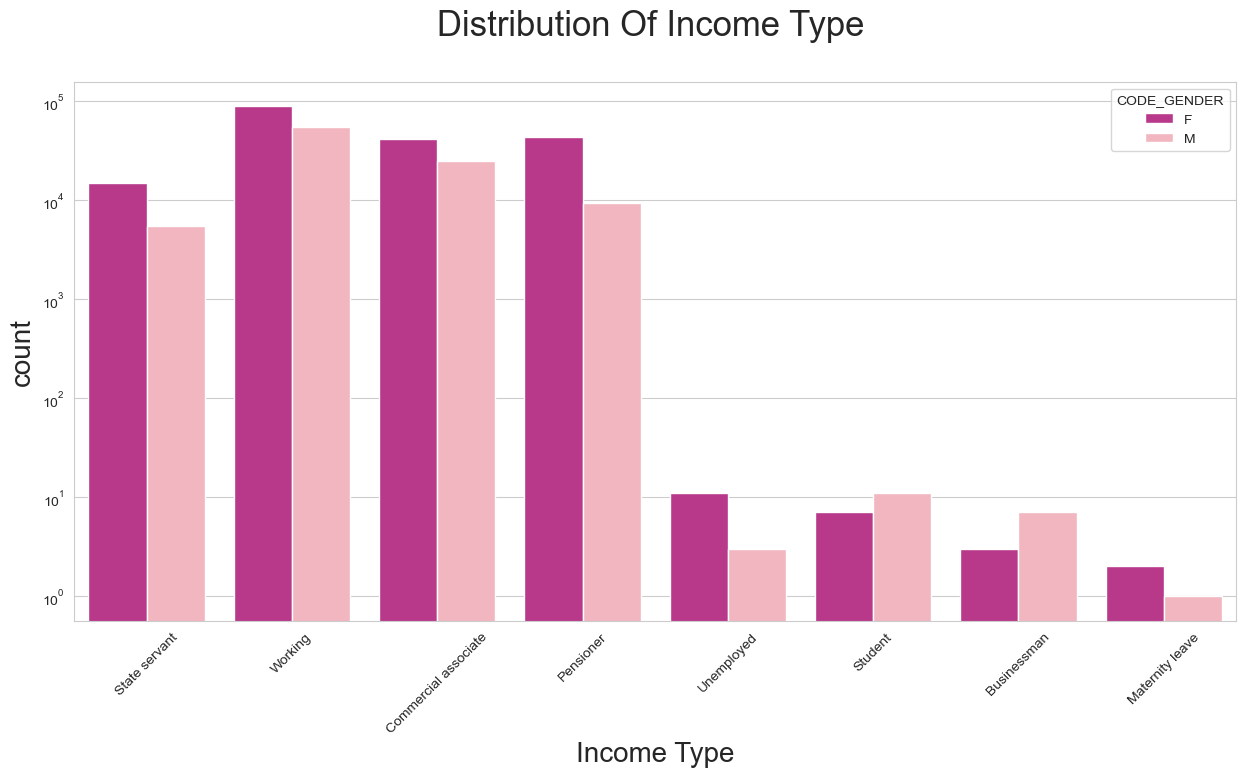

In [85]:
# plotting for the various income type across the various gender

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_0,x='NAME_INCOME_TYPE',hue='CODE_GENDER',palette='RdPu_r')
plt.xticks(rotation=45)
plt.title('Distribution Of Income Type \n',fontsize=25)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('count',fontsize= 20)
plt.yscale('log')
plt.show()





### Conclusion from the graph
#### 1) Working women have more credit than other
#### 2) It seems that 'State Servent','Working','commercial associate','pensioner' have more credit than other
#### 3) Women in the maternity leave have less credit than other 

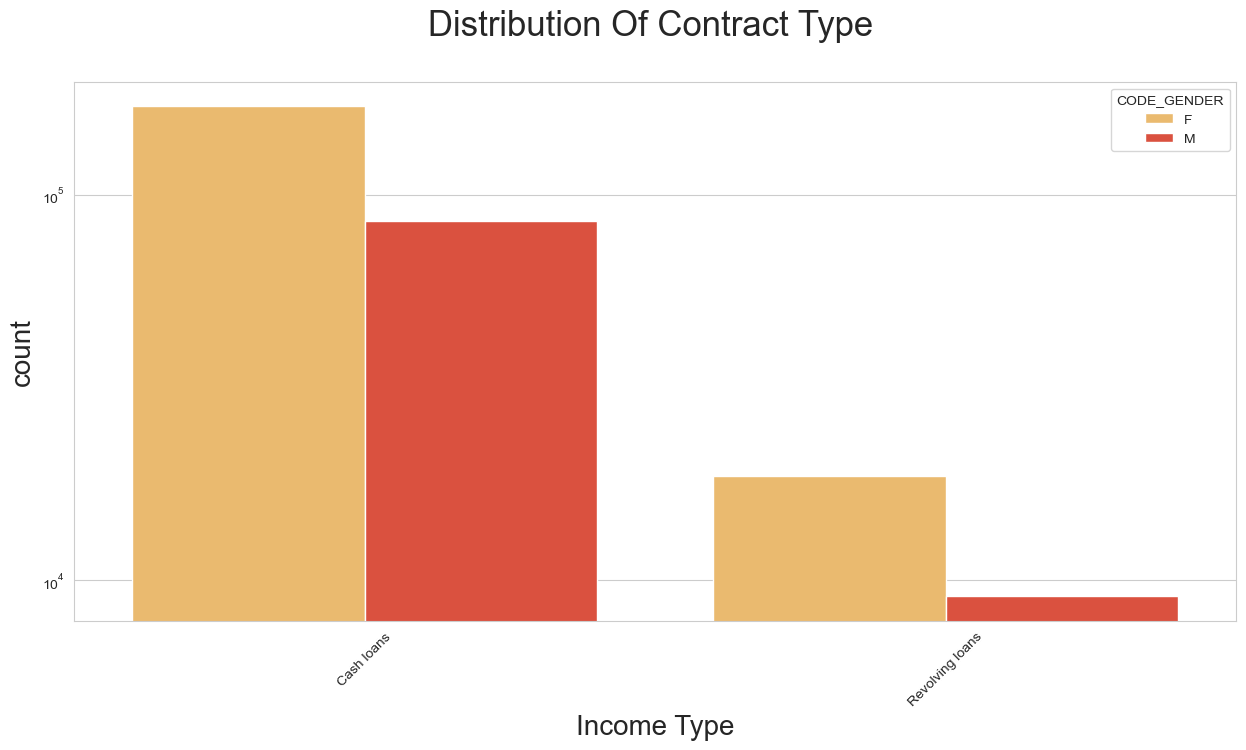

In [86]:
# plotting for the contract type accross the gender
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_0,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',palette='YlOrRd')
plt.xticks(rotation=45)
plt.title('Distribution Of Contract Type \n',fontsize=25)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('count',fontsize= 20)
plt.yscale('log')
plt.show()



# Conclusion
#### 1) It seems that  "cash loan" is having higher number of credit than "Revolving loan"
#### 2) Female applies for more number of credit than male ie means female are more likely to default the loans


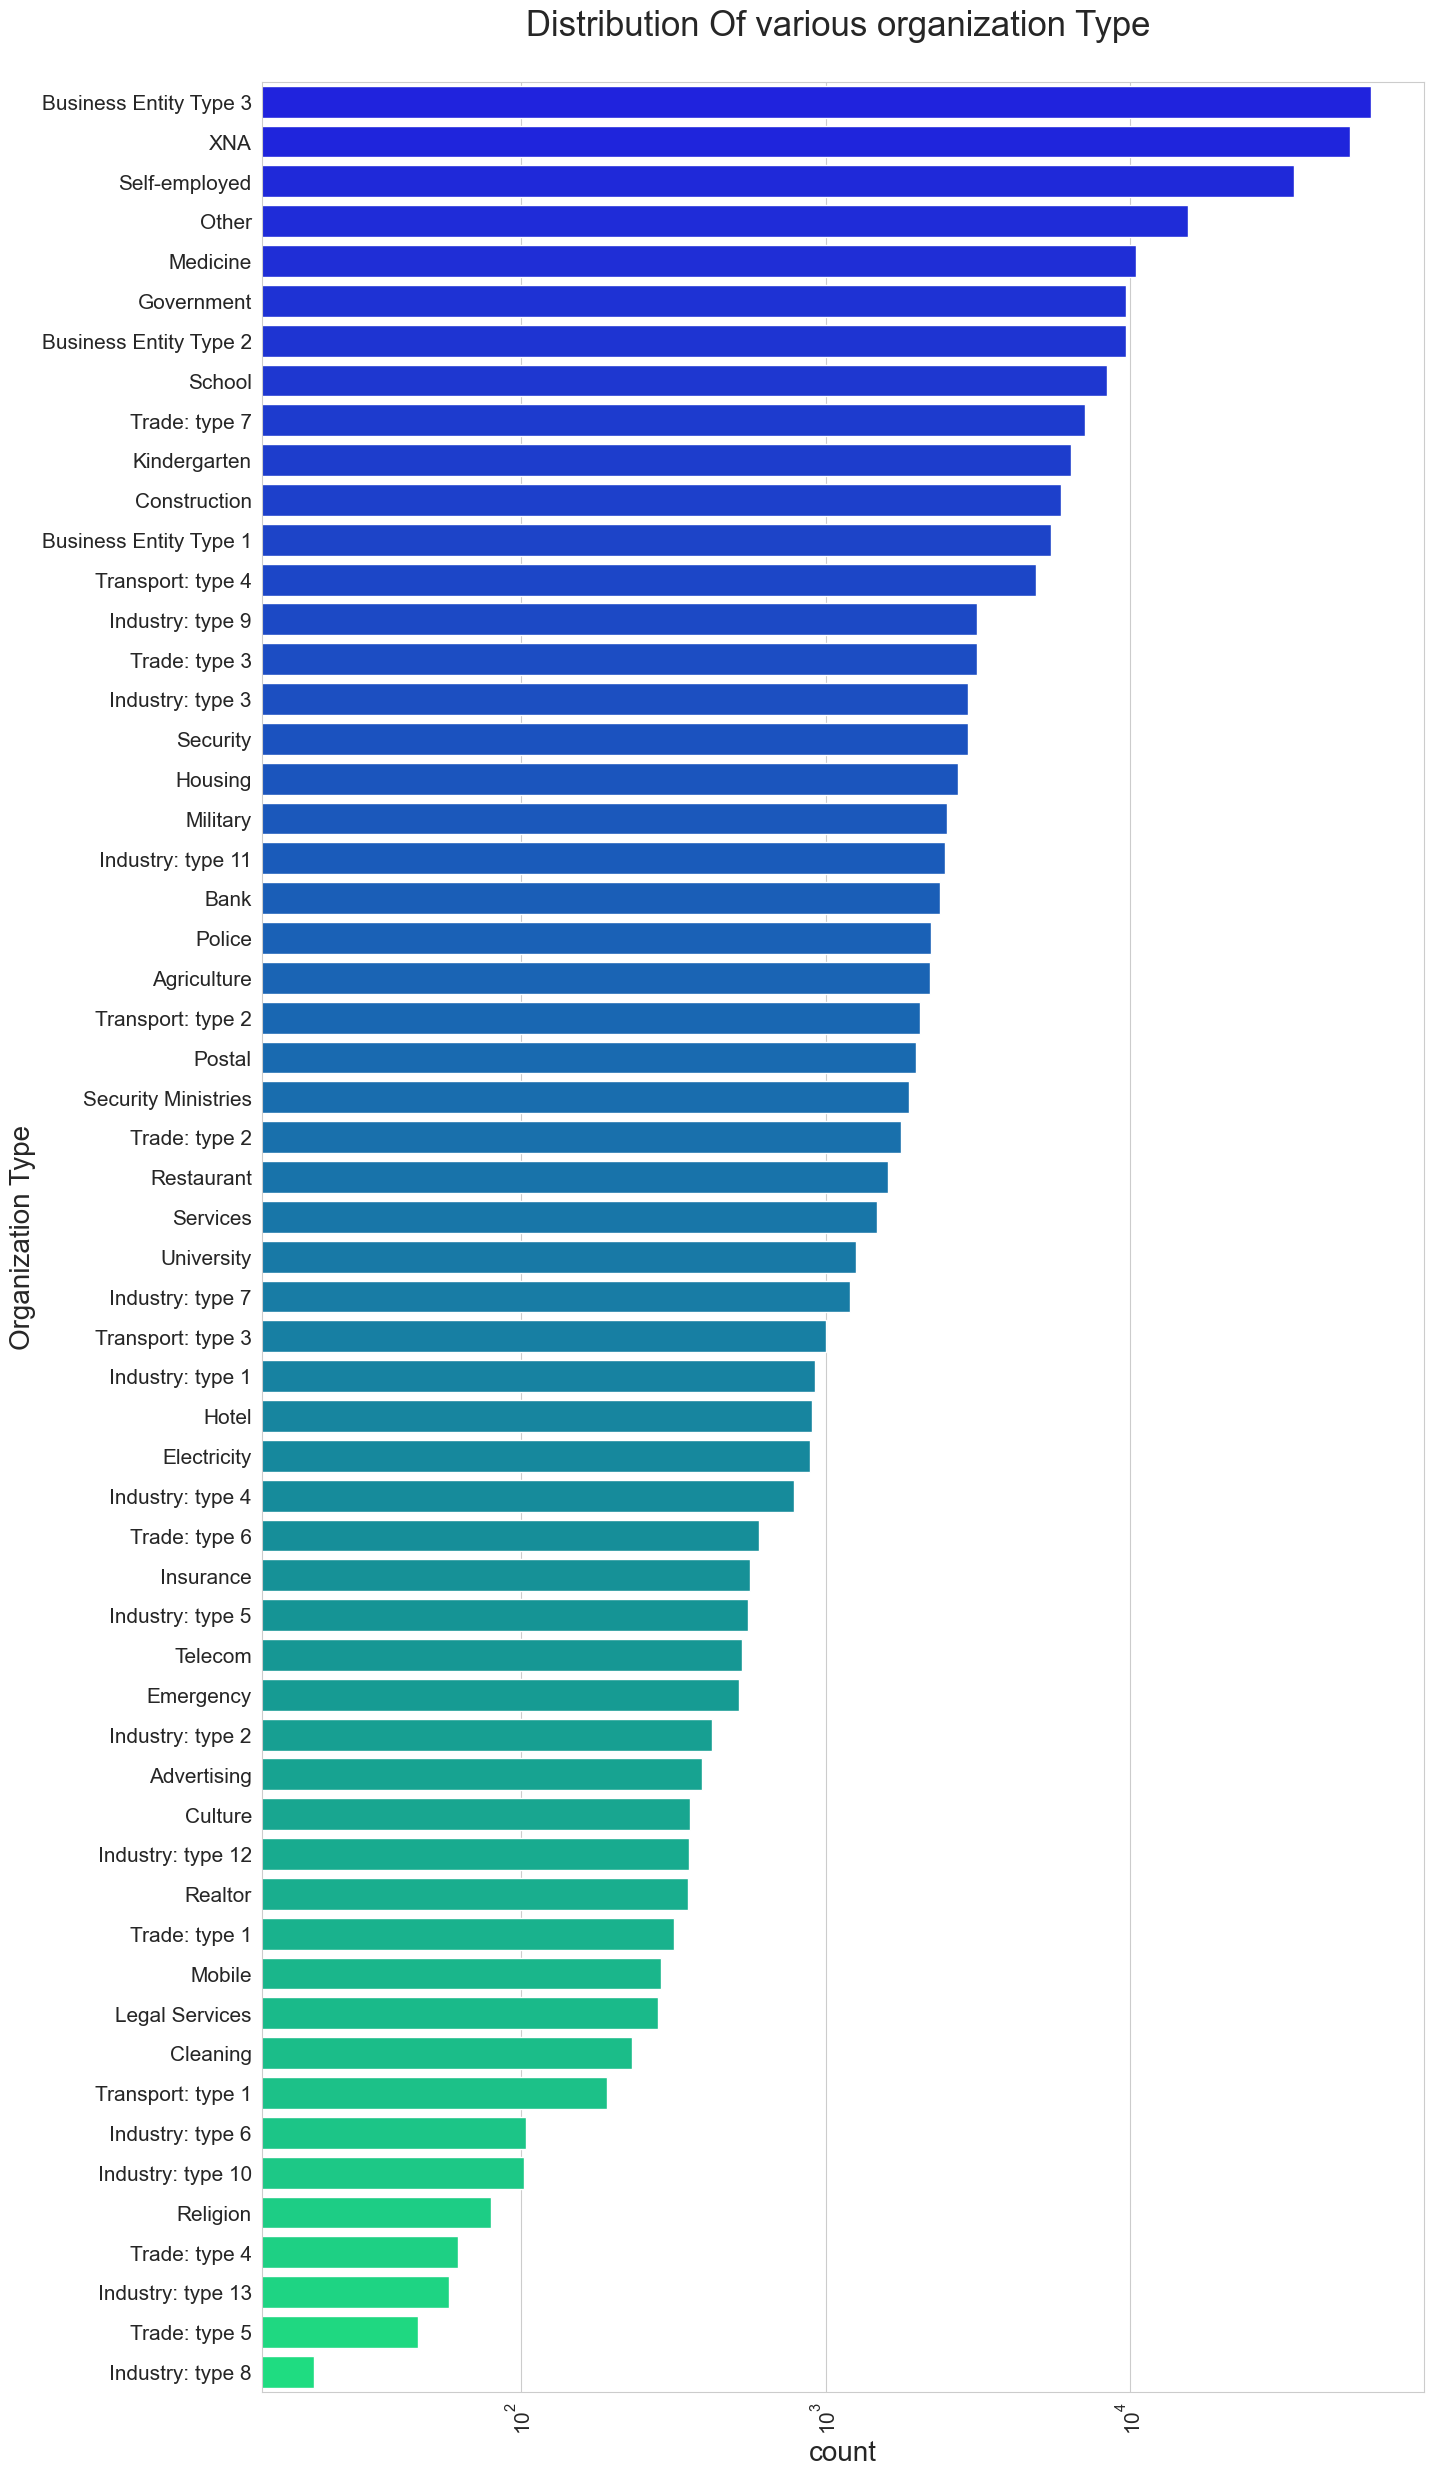

In [87]:
#plotting for various organization type
plt.figure(figsize=[15,30])

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order= target_0['ORGANIZATION_TYPE'].value_counts().index, palette='winter')
plt.title('Distribution Of various organization Type \n',fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlabel('count',fontsize=20)
plt.ylabel('Organization Type',fontsize= 20)
plt.show()


# Conclusion:
#### 1) customer who have applied for the credit are mostly belongs to the organization type: 1) Business Entity type 3 2) medicine 3) government and other
#### 2) Organization tyoe Trade Type5 and industry type 8 have less customers who have applied for the credit

In [88]:
#Calculating the corelation among the Target_0 people
target_0_corr = target_0.iloc[0:,2:].corr()
target_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020909,-0.000526,-0.024363,0.336966,-0.243356,0.185792,-0.028751,0.878571,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.030513
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418948,0.349363,0.167851,0.062609,-0.141250,0.064937,0.022896,0.034256,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.042522
AMT_CREDIT,0.003081,0.342799,1.000000,0.771297,0.986880,0.100604,-0.047378,-0.072515,0.013477,-0.001464,0.064536,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.027599
AMT_ANNUITY,0.020909,0.418948,0.771297,1.000000,0.776251,0.120977,0.012260,-0.106421,0.039435,0.014111,0.075789,0.053584,0.041983,0.080646,0.075464,-0.005679,0.001516,0.010577,0.126611,-0.013088,-0.022533,-0.012889,-0.023383,0.003149,0.002392,0.012671,0.038178,0.011248,-0.005588
AMT_GOODS_PRICE,-0.000526,0.349363,0.986880,0.776251,1.000000,0.103790,-0.044547,-0.071030,0.015909,-0.003649,0.062779,0.062738,0.026726,0.054895,0.054383,-0.024865,-0.016736,0.001308,0.135635,-0.000706,-0.021018,-0.000722,-0.023161,-0.003115,0.004822,-0.001595,0.055847,0.018161,-0.029878
REGION_POPULATION_RELATIVE,-0.024363,0.167851,0.100604,0.120977,0.103790,1.000000,-0.025244,-0.006961,-0.052083,-0.001071,-0.023425,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,-0.001427
DAYS_BIRTH,0.336966,0.062609,-0.047378,0.012260,-0.044547,-0.025244,1.000000,-0.618048,0.333151,0.271314,0.285825,0.095916,0.066252,0.097908,0.071648,0.179772,0.241904,0.160072,-0.078158,0.007726,-0.003057,0.007316,-0.000990,0.004461,0.002772,-0.001069,0.002855,-0.011335,-0.077657
DAYS_EMPLOYED,-0.243356,-0.141250,-0.072515,-0.106421,-0.071030,-0.006961,-0.618048,1.000000,-0.210187,-0.274290,-0.237413,-0.094844,-0.035854,-0.108539,-0.097022,-0.089586,-0.254453,-0.219190,-0.030732,0.007252,0.019579,0.007431,0.016635,-0.004497,-0.000802,0.002304,-0.035564,0.015288,0.043039
DAYS_REGISTRATION,0.185792,0.064937,0.013477,0.039435,0.015909,-0.052083,0.333151,-0.210187,1.000000,0.100236,0.175630,-0.008044,0.028700,0.037870,0.028475,0.064216,0.098919,0.072248,-0.052503,0.008315,0.001213,0.008247,0.002652,-0.002730,-0.000035,-0.001431,-0.011857,-0.000527,-0.022933
DAYS_ID_PUBLISH,-0.028751,0.022896,-0.001464,0.014111,-0.003649,-0.001071,0.271314,-0.274290,0.100236,1.000000,-0.020460,0.033980,0.034692,0.049161,0.035069,0.075096,0.099628,0.062259,-0.041703,-0.012326,0.000403,-0.012810,0.002491,0.004797,-0.000198,-0.001655,-0.008728,-0.007071,-0.061619


## Target _1
### Plotting The Graphs For The People Who Have Difficulty In Paying The Loans

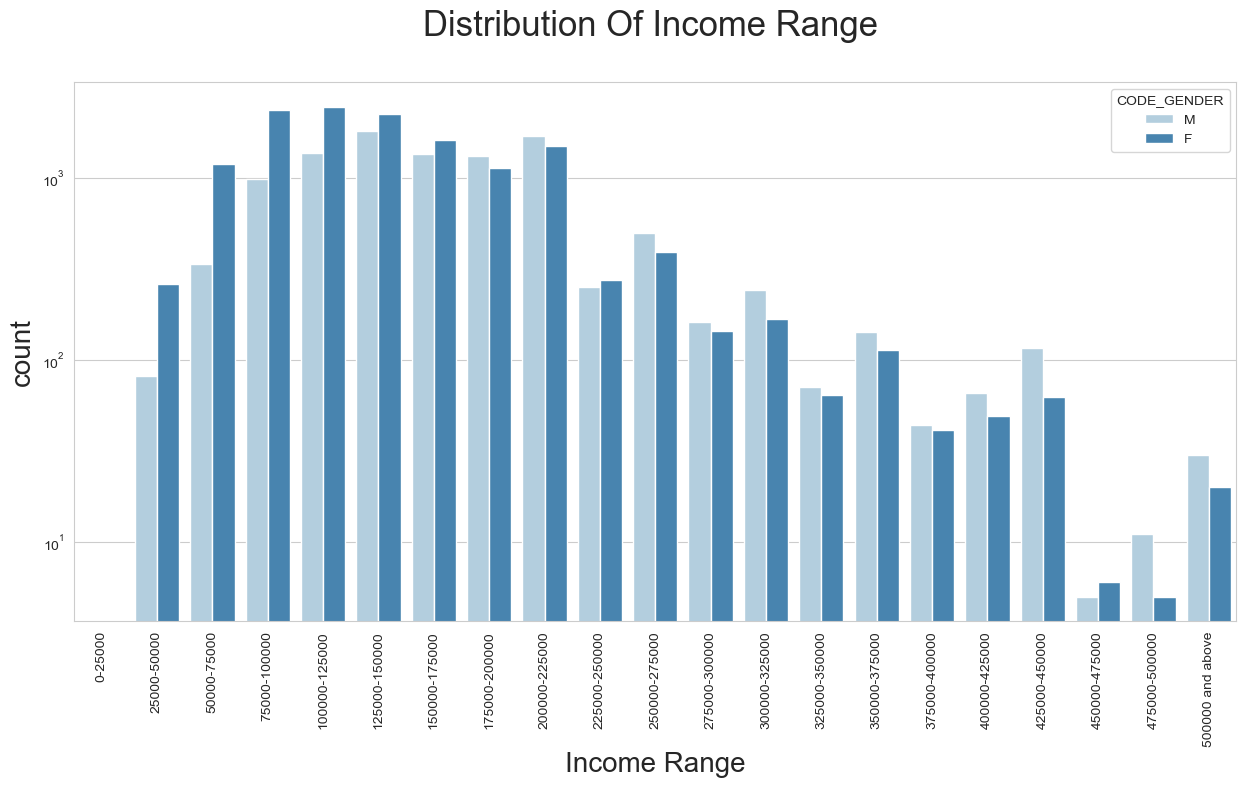

In [90]:
#plotting for income range across various gender
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_1,x='AMT_INCOME_RANGE',hue='CODE_GENDER',palette='Blues')
plt.xticks(rotation=90)
plt.title('Distribution Of Income Range \n',fontsize=25)
plt.xlabel('Income Range',fontsize=20)
plt.ylabel('count',fontsize= 20)
plt.yscale('log')
plt.show()

## conclusion:
##### 1) Males have higher count than female
#### 2) income range between 75000 to 250000 have more credit than other
#### 3) less count for the income range between 275000 to 475000

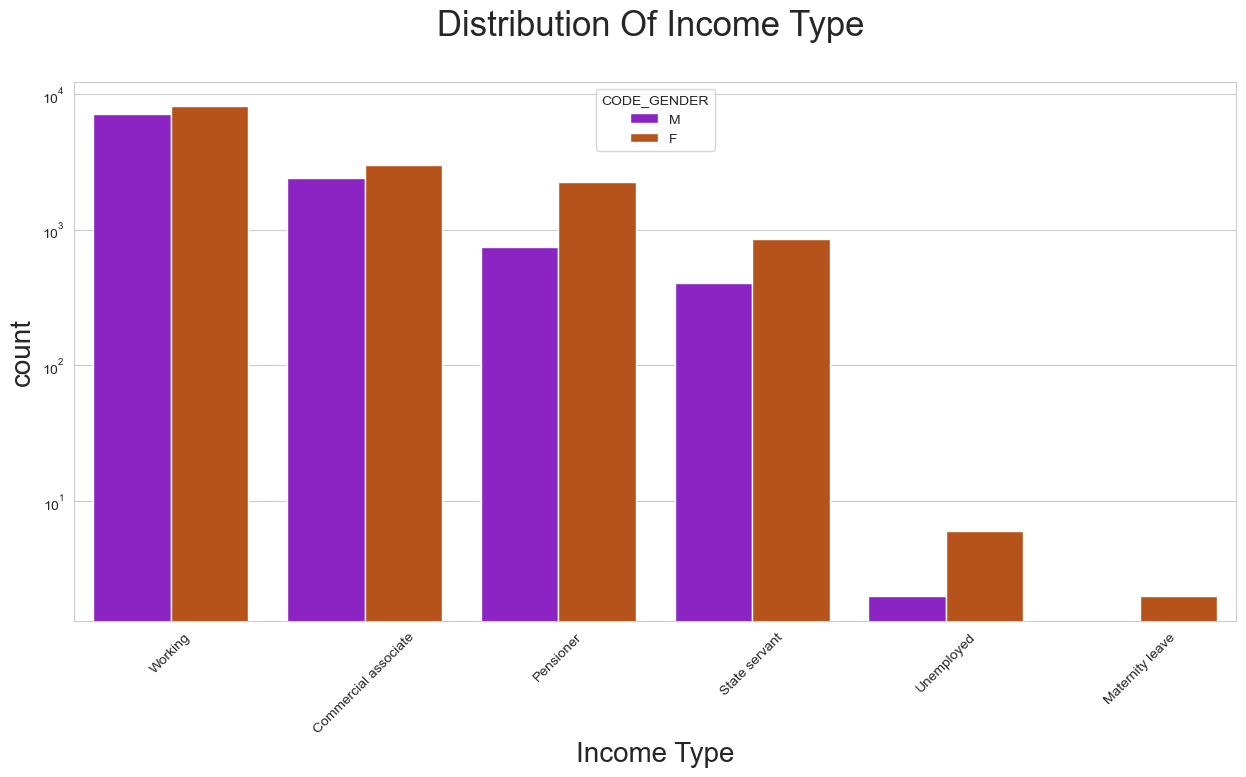

In [46]:
# Plottingfor the various income type across various gender

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_1,x='NAME_INCOME_TYPE',hue='CODE_GENDER',palette='gnuplot')
plt.xticks(rotation=45)
plt.title('Distribution Of Income Type \n',fontsize=25)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('count',fontsize= 20)
plt.yscale('log')
plt.show()

# Conclusion:
#### 1) For the income type working , commercial associate ,pensioner, state servent number of credit is higher than other like maternity leave
#### 2) Female are having the more number of credit than males

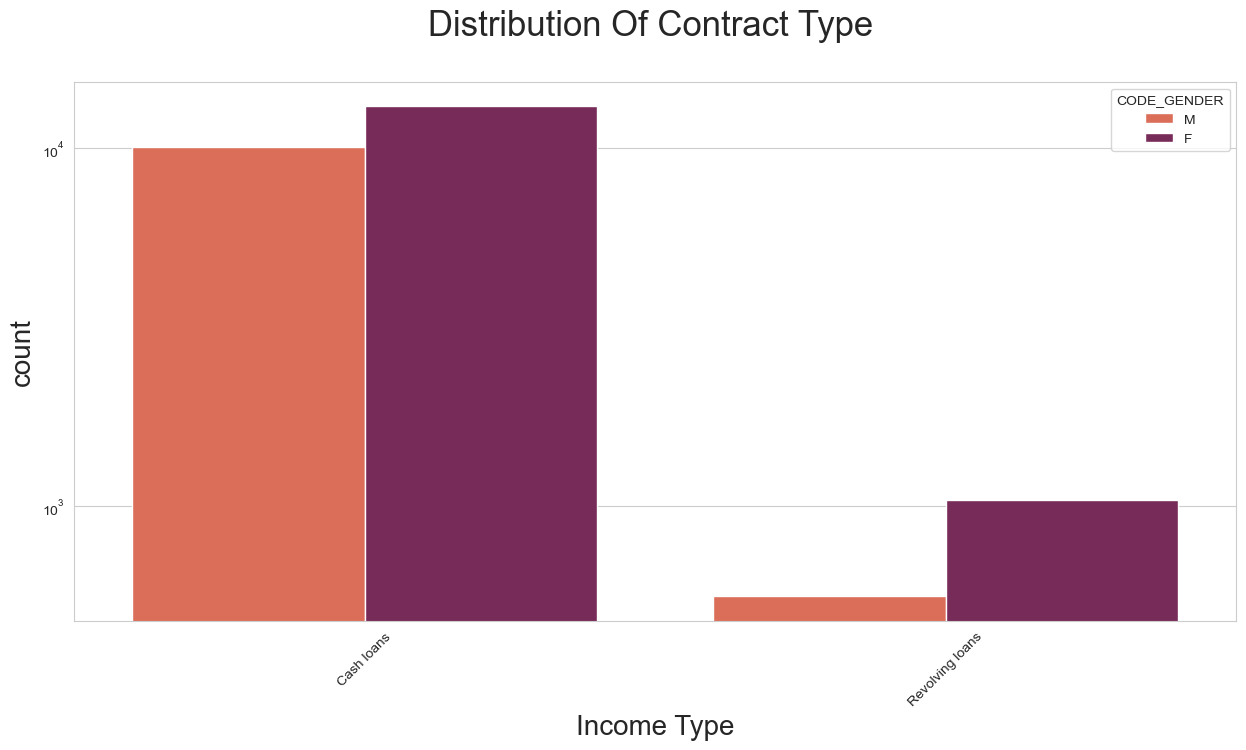

In [47]:
# Ploting the graph for the contract type across the various gender
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_1,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',palette='rocket_r')
plt.xticks(rotation=45)
plt.title('Distribution Of Contract Type \n',fontsize=25)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('count',fontsize= 20)
plt.yscale('log')
plt.show()

# Conclusion:
#### 1) For the contract type Cash loans are higher than the Revolving loans 
#### 2) In contract type females are leading in availing the loans


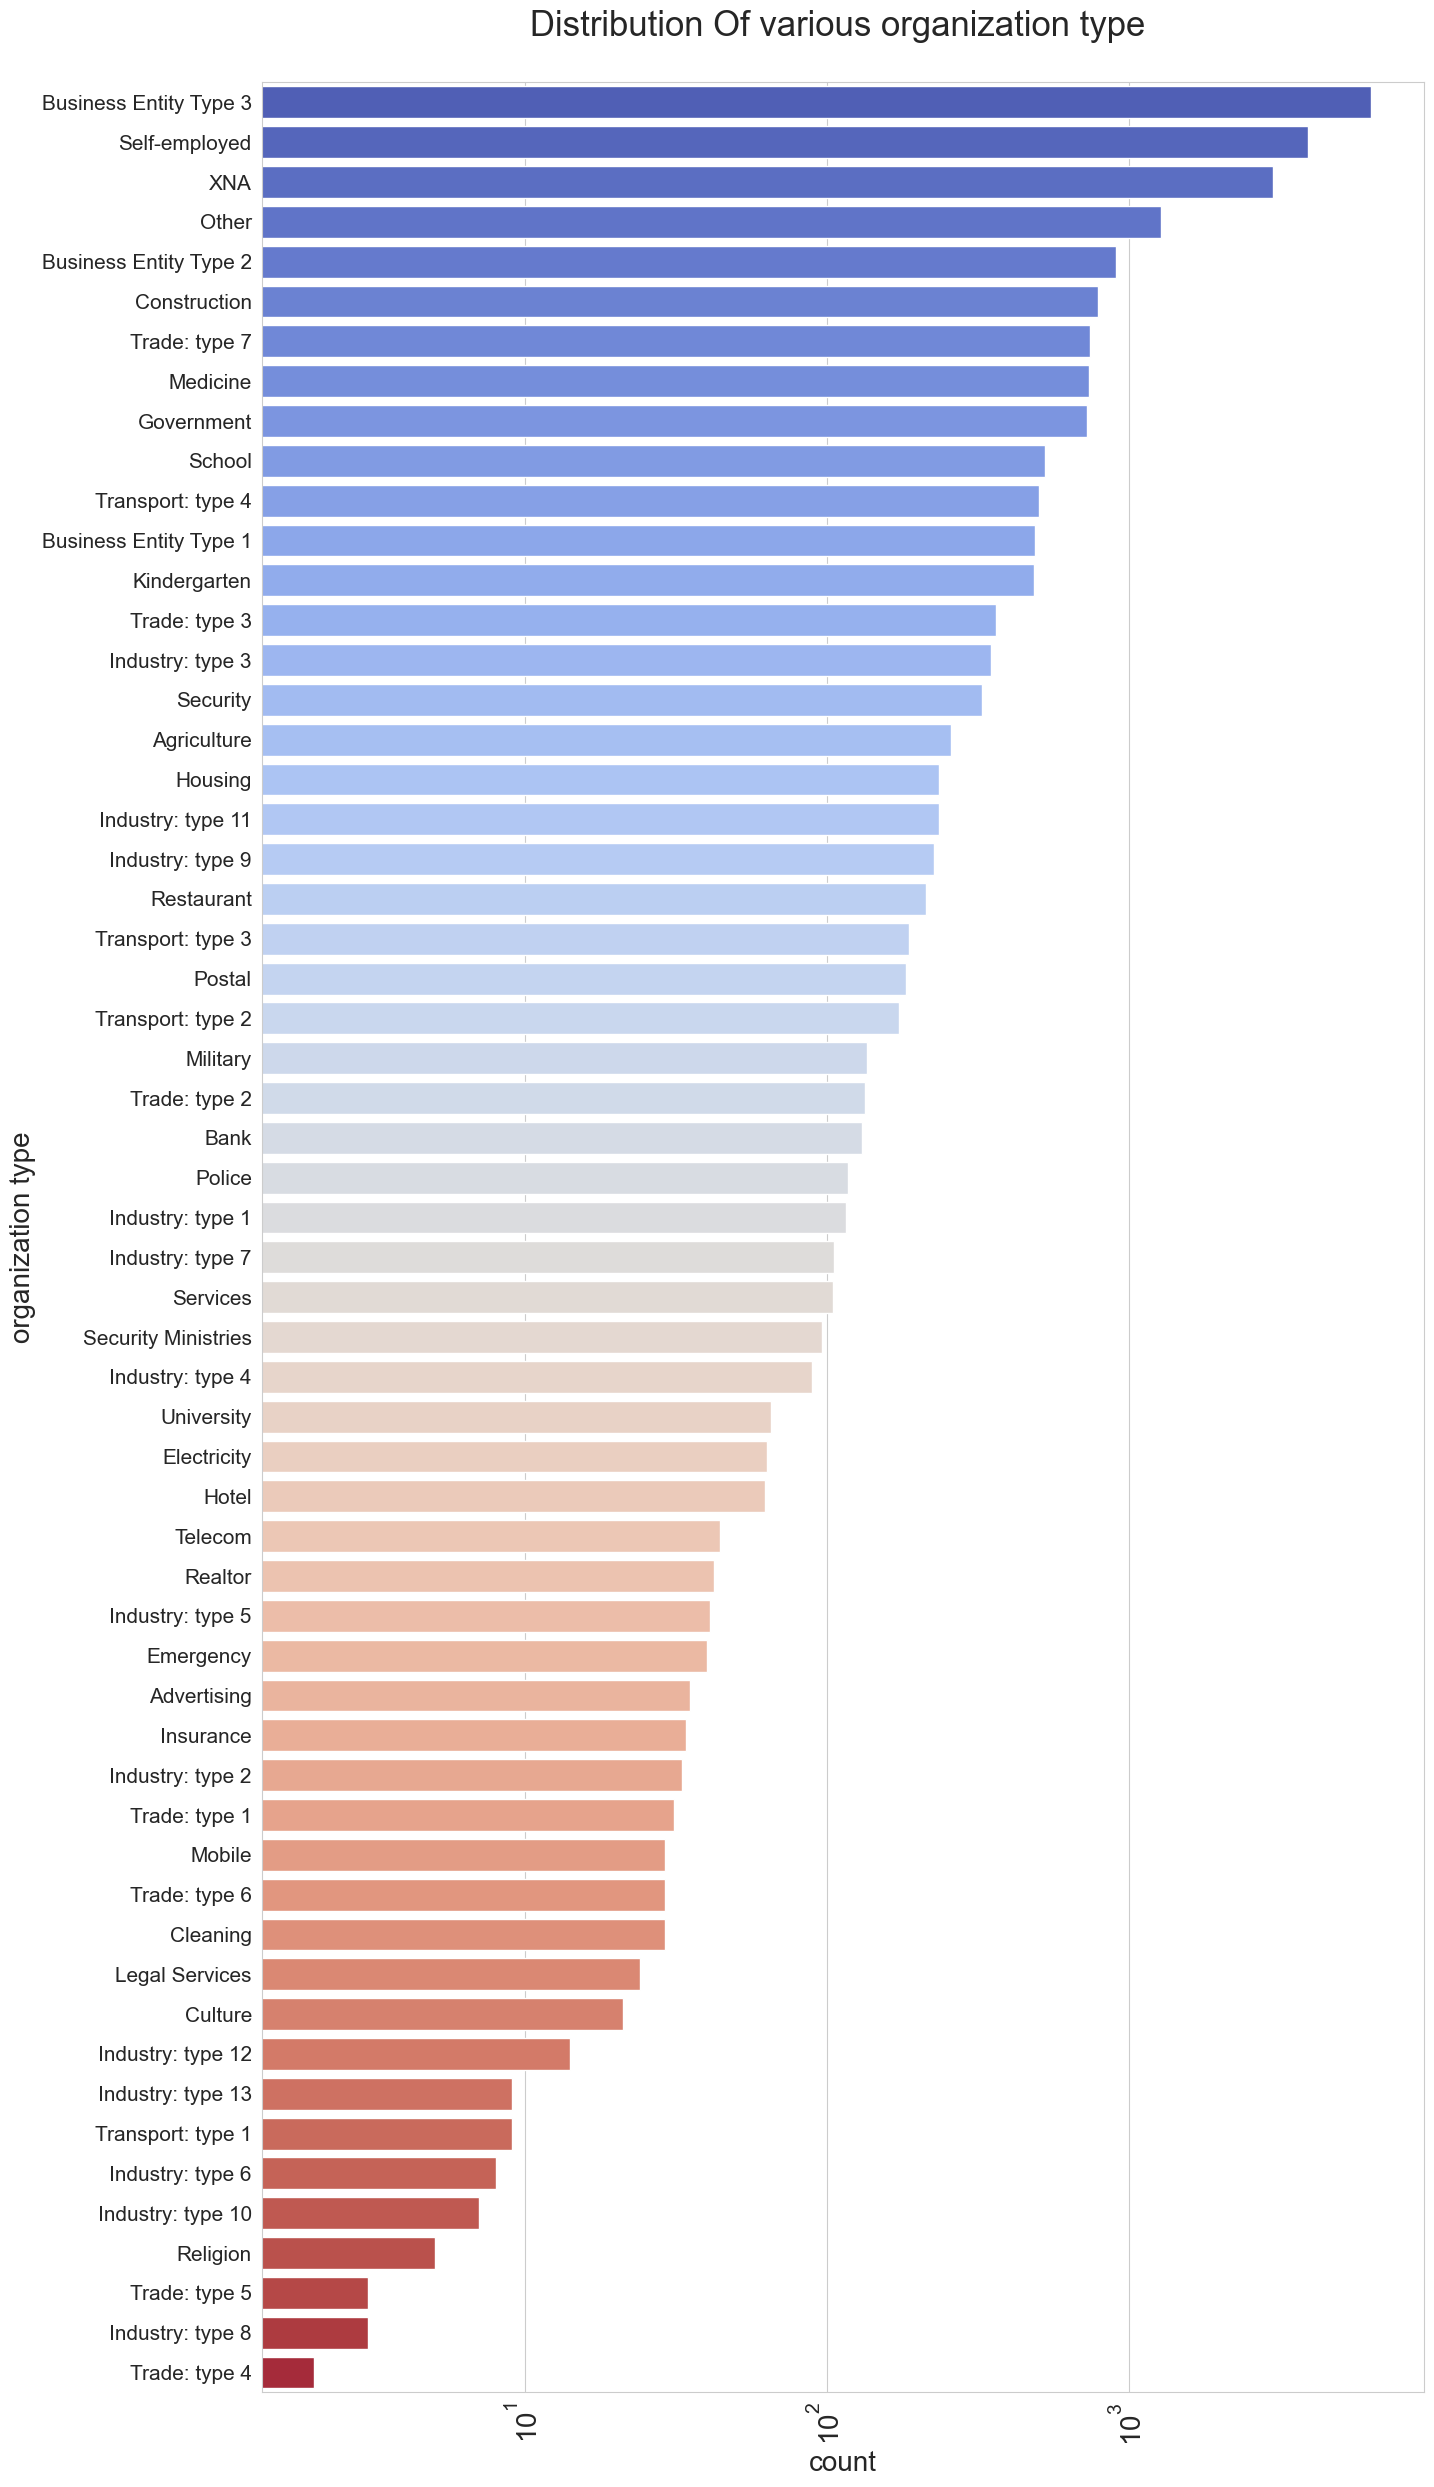

In [92]:
#Plotting for the various organization type
plt.figure(figsize=[15,30])

sns.countplot(data=target_1,y='ORGANIZATION_TYPE',order=target_1['ORGANIZATION_TYPE'].value_counts().index,palette='coolwarm')
plt.title('Distribution Of various organization type \n',fontsize=25)
plt.xticks(rotation=90,fontsize= 20)
plt.yticks(fontsize=15)
plt.title('Distribution Of various organization type \n',fontsize=25)
plt.xlabel('count',fontsize=20)
plt.ylabel('organization type',fontsize= 20)
plt.xscale('log')
plt.show()


# conclusion:
#### 1) customers who have applied for loans are belongs  to 1) Business Entity type3 2) self employed 3) other
#### 2) Less customer beongs to Trade 5 , Trade 4 and Industry: type8

In [49]:
# calculating the corelation among the Target_0 people
target_0_corr= target_0.iloc[0:,2:].corr()
target_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020909,-0.000526,-0.024363,0.336966,-0.243356,0.185792,-0.028751,0.878571,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.030513
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418948,0.349363,0.167851,0.062609,-0.141250,0.064937,0.022896,0.034256,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.042522
AMT_CREDIT,0.003081,0.342799,1.000000,0.771297,0.986880,0.100604,-0.047378,-0.072515,0.013477,-0.001464,0.064536,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.027599
AMT_ANNUITY,0.020909,0.418948,0.771297,1.000000,0.776251,0.120977,0.012260,-0.106421,0.039435,0.014111,0.075789,0.053584,0.041983,0.080646,0.075464,-0.005679,0.001516,0.010577,0.126611,-0.013088,-0.022533,-0.012889,-0.023383,0.003149,0.002392,0.012671,0.038178,0.011248,-0.005588
AMT_GOODS_PRICE,-0.000526,0.349363,0.986880,0.776251,1.000000,0.103790,-0.044547,-0.071030,0.015909,-0.003649,0.062779,0.062738,0.026726,0.054895,0.054383,-0.024865,-0.016736,0.001308,0.135635,-0.000706,-0.021018,-0.000722,-0.023161,-0.003115,0.004822,-0.001595,0.055847,0.018161,-0.029878
REGION_POPULATION_RELATIVE,-0.024363,0.167851,0.100604,0.120977,0.103790,1.000000,-0.025244,-0.006961,-0.052083,-0.001071,-0.023425,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,-0.001427
DAYS_BIRTH,0.336966,0.062609,-0.047378,0.012260,-0.044547,-0.025244,1.000000,-0.618048,0.333151,0.271314,0.285825,0.095916,0.066252,0.097908,0.071648,0.179772,0.241904,0.160072,-0.078158,0.007726,-0.003057,0.007316,-0.000990,0.004461,0.002772,-0.001069,0.002855,-0.011335,-0.077657
DAYS_EMPLOYED,-0.243356,-0.141250,-0.072515,-0.106421,-0.071030,-0.006961,-0.618048,1.000000,-0.210187,-0.274290,-0.237413,-0.094844,-0.035854,-0.108539,-0.097022,-0.089586,-0.254453,-0.219190,-0.030732,0.007252,0.019579,0.007431,0.016635,-0.004497,-0.000802,0.002304,-0.035564,0.015288,0.043039
DAYS_REGISTRATION,0.185792,0.064937,0.013477,0.039435,0.015909,-0.052083,0.333151,-0.210187,1.000000,0.100236,0.175630,-0.008044,0.028700,0.037870,0.028475,0.064216,0.098919,0.072248,-0.052503,0.008315,0.001213,0.008247,0.002652,-0.002730,-0.000035,-0.001431,-0.011857,-0.000527,-0.022933
DAYS_ID_PUBLISH,-0.028751,0.022896,-0.001464,0.014111,-0.003649,-0.001071,0.271314,-0.274290,0.100236,1.000000,-0.020460,0.033980,0.034692,0.049161,0.035069,0.075096,0.099628,0.062259,-0.041703,-0.012326,0.000403,-0.012810,0.002491,0.004797,-0.000198,-0.001655,-0.008728,-0.007071,-0.061619


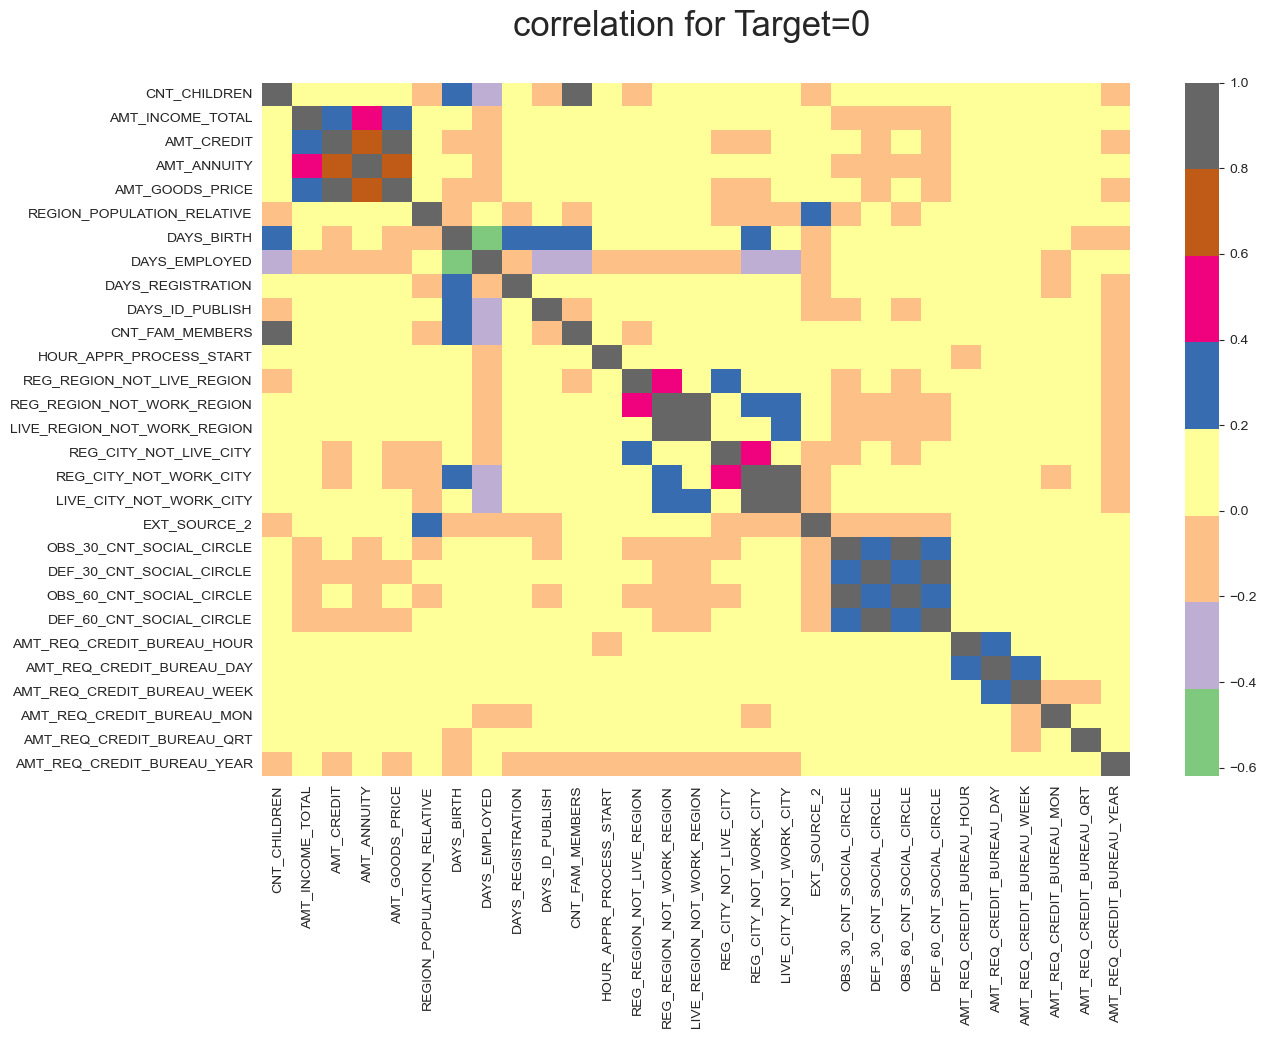

In [50]:
#plotting the correlation for the target_0 people
plt.figure(figsize=[14,9])

sns.heatmap(target_0_corr,annot=False, cmap="Accent")
plt.title('correlation for Target=0 \n',fontsize=25)
plt.show()

# Conclusion:
##### 1) credit amount is inversly propotional to the date of birth i.e credit amount is higher to lower age people
##### 2) credit amount is depends upon the number children clints have means higher amount to the client who have less children and vice-versa
####  3) Income amount and number of childern have inverse relationship i.e more income less children and vice versa

In [51]:
# calculating the corelation among the target_1 people
target_1_corr= target_1.iloc[0:,2:].corr()
target_1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008107,-0.031975,0.259109,-0.191942,0.149154,-0.032299,0.885484,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.012260,0.025804,0.001448,0.025180,-0.005106,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.021572
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037572,0.009135,0.003096,-0.014979,0.000158,-0.004215,0.006654,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,0.007154,-0.004709,-0.005186,-0.004616,-0.004866,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.006802
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.982566,0.069161,-0.135316,-0.000968,-0.025854,-0.052329,0.051224,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.120848,0.019098,-0.025979,0.019487,-0.030880,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.009317
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752022,0.071690,-0.014303,-0.082552,0.034279,-0.016767,0.075711,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.116305,0.004463,-0.022394,0.005500,-0.027495,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.007090
AMT_GOODS_PRICE,-0.008107,0.037572,0.982566,0.752022,1.000000,0.075989,-0.135754,0.003575,-0.025677,-0.056050,0.047381,0.044302,0.022374,0.036227,0.035455,-0.034137,-0.038874,-0.016639,0.131198,0.019923,-0.021738,0.020380,-0.026119,-0.004504,0.004272,0.007963,0.058540,-0.016018,-0.011660
REGION_POPULATION_RELATIVE,-0.031975,0.009135,0.069161,0.071690,0.075989,1.000000,-0.048190,0.015103,-0.056222,-0.015537,-0.030163,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.169751,0.006224,0.025865,0.006793,0.018231,-0.001238,-0.005483,0.002904,0.071329,-0.007299,0.005437
DAYS_BIRTH,0.259109,0.003096,-0.135316,-0.014303,-0.135754,-0.048190,1.000000,-0.575097,0.289114,0.252863,0.203267,0.062172,0.054654,0.069564,0.045517,0.161858,0.215192,0.123623,-0.108662,-0.005164,0.004946,-0.005391,0.004001,0.014654,-0.007248,-0.005537,-0.005713,-0.017214,-0.087811
DAYS_EMPLOYED,-0.191942,-0.014979,-0.000968,-0.082552,0.003575,0.015103,-0.575097,1.000000,-0.188929,-0.226470,-0.186561,-0.059997,-0.033331,-0.088954,-0.077201,-0.084961,-0.242019,-0.196453,-0.001479,-0.008866,0.003205,-0.009151,0.005399,-0.007632,0.021363,0.014720,-0.025738,0.014982,0.026917
DAYS_REGISTRATION,0.149154,0.000158,-0.025854,0.034279,-0.025677,-0.056222,0.289114,-0.188929,1.000000,0.096833,0.145828,-0.032518,0.020403,0.021183,0.015547,0.048585,0.088427,0.062636,-0.069996,0.014104,0.010299,0.014522,0.009157,-0.004984,-0.008367,0.003130,0.004876,-0.012457,-0.014311
DAYS_ID_PUBLISH,-0.032299,-0.004215,-0.052329,-0.016767,-0.056050,-0.015537,0.252863,-0.226470,0.096833,1.000000,-0.031785,0.021661,0.032746,0.032932,0.020241,0.067427,0.070224,0.031431,-0.059814,-0.019968,0.007602,-0.019594,0.004946,0.003837,-0.012654,0.003047,-0.014166,0.007995,-0.070891


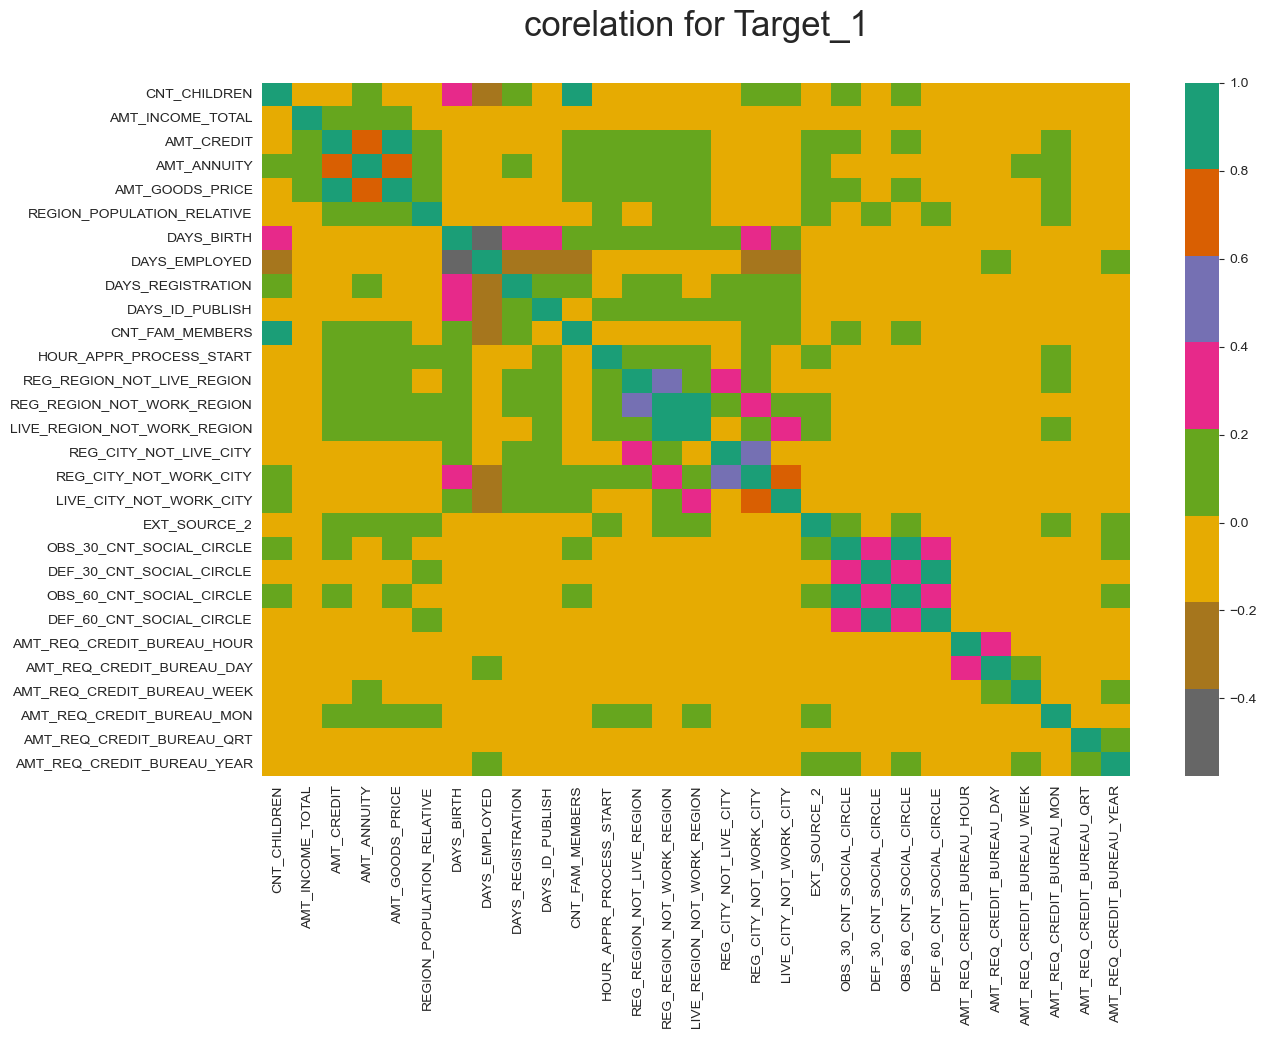

In [52]:
#plotting the corelation for the target_0 people
plt.figure(figsize=[14,9])
sns.heatmap(target_1_corr, annot=False,cmap='Dark2_r')
plt.title('corelation for Target_1\n',fontsize =25)
plt.show()

# Conclusion:
#### 1) The client's permanent address doesnot match the contact address are having less children and vice-versa
#### 2)The client's  permanent address doesnot match the work address are having less children and vice-versa

# Finding The Top 10 Correlation for Target_0 and Target_1

In [53]:
#finding the correlation for target_0
target_0_corr=target_0.iloc[0:,2:].corr()
target_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020909,-0.000526,-0.024363,0.336966,-0.243356,0.185792,-0.028751,0.878571,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.030513
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418948,0.349363,0.167851,0.062609,-0.141250,0.064937,0.022896,0.034256,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.042522
AMT_CREDIT,0.003081,0.342799,1.000000,0.771297,0.986880,0.100604,-0.047378,-0.072515,0.013477,-0.001464,0.064536,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.027599
AMT_ANNUITY,0.020909,0.418948,0.771297,1.000000,0.776251,0.120977,0.012260,-0.106421,0.039435,0.014111,0.075789,0.053584,0.041983,0.080646,0.075464,-0.005679,0.001516,0.010577,0.126611,-0.013088,-0.022533,-0.012889,-0.023383,0.003149,0.002392,0.012671,0.038178,0.011248,-0.005588
AMT_GOODS_PRICE,-0.000526,0.349363,0.986880,0.776251,1.000000,0.103790,-0.044547,-0.071030,0.015909,-0.003649,0.062779,0.062738,0.026726,0.054895,0.054383,-0.024865,-0.016736,0.001308,0.135635,-0.000706,-0.021018,-0.000722,-0.023161,-0.003115,0.004822,-0.001595,0.055847,0.018161,-0.029878
REGION_POPULATION_RELATIVE,-0.024363,0.167851,0.100604,0.120977,0.103790,1.000000,-0.025244,-0.006961,-0.052083,-0.001071,-0.023425,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,-0.001427
DAYS_BIRTH,0.336966,0.062609,-0.047378,0.012260,-0.044547,-0.025244,1.000000,-0.618048,0.333151,0.271314,0.285825,0.095916,0.066252,0.097908,0.071648,0.179772,0.241904,0.160072,-0.078158,0.007726,-0.003057,0.007316,-0.000990,0.004461,0.002772,-0.001069,0.002855,-0.011335,-0.077657
DAYS_EMPLOYED,-0.243356,-0.141250,-0.072515,-0.106421,-0.071030,-0.006961,-0.618048,1.000000,-0.210187,-0.274290,-0.237413,-0.094844,-0.035854,-0.108539,-0.097022,-0.089586,-0.254453,-0.219190,-0.030732,0.007252,0.019579,0.007431,0.016635,-0.004497,-0.000802,0.002304,-0.035564,0.015288,0.043039
DAYS_REGISTRATION,0.185792,0.064937,0.013477,0.039435,0.015909,-0.052083,0.333151,-0.210187,1.000000,0.100236,0.175630,-0.008044,0.028700,0.037870,0.028475,0.064216,0.098919,0.072248,-0.052503,0.008315,0.001213,0.008247,0.002652,-0.002730,-0.000035,-0.001431,-0.011857,-0.000527,-0.022933
DAYS_ID_PUBLISH,-0.028751,0.022896,-0.001464,0.014111,-0.003649,-0.001071,0.271314,-0.274290,0.100236,1.000000,-0.020460,0.033980,0.034692,0.049161,0.035069,0.075096,0.099628,0.062259,-0.041703,-0.012326,0.000403,-0.012810,0.002491,0.004797,-0.000198,-0.001655,-0.008728,-0.007071,-0.061619


In [54]:
#converting the negative values to positive values and sorting the values
corr_0=target_0_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_0=corr_0[corr_0 != 1.0]
corr_0

DAYS_REGISTRATION            AMT_REQ_CREDIT_BUREAU_DAY      0.000035
AMT_REQ_CREDIT_BUREAU_DAY    DAYS_REGISTRATION              0.000035
AMT_REQ_CREDIT_BUREAU_WEEK   REG_REGION_NOT_WORK_REGION     0.000125
REG_REGION_NOT_WORK_REGION   AMT_REQ_CREDIT_BUREAU_WEEK     0.000125
AMT_REQ_CREDIT_BUREAU_HOUR   LIVE_CITY_NOT_WORK_CITY        0.000149
LIVE_CITY_NOT_WORK_CITY      AMT_REQ_CREDIT_BUREAU_HOUR     0.000149
AMT_REQ_CREDIT_BUREAU_DAY    CNT_FAM_MEMBERS                0.000181
CNT_FAM_MEMBERS              AMT_REQ_CREDIT_BUREAU_DAY      0.000181
AMT_REQ_CREDIT_BUREAU_DAY    DAYS_ID_PUBLISH                0.000198
DAYS_ID_PUBLISH              AMT_REQ_CREDIT_BUREAU_DAY      0.000198
AMT_REQ_CREDIT_BUREAU_QRT    REG_CITY_NOT_LIVE_CITY         0.000270
REG_CITY_NOT_LIVE_CITY       AMT_REQ_CREDIT_BUREAU_QRT      0.000270
DEF_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_QRT      0.000274
AMT_REQ_CREDIT_BUREAU_QRT    DEF_60_CNT_SOCIAL_CIRCLE       0.000274
OBS_60_CNT_SOCIAL_CIRCLE     AMT_R

In [55]:
# Top 10 correlation for target=0,
corr_0.tail(10)

DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859332
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859332
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861861
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
AMT_CREDIT                   AMT_GOODS_PRICE                0.986880
AMT_GOODS_PRICE              AMT_CREDIT                     0.986880
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998508
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998508
dtype: float64

In [56]:
# finding the top 10 correlation for target=1
target_1_corr=target_1.iloc[0:,2:].corr()
target_1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008107,-0.031975,0.259109,-0.191942,0.149154,-0.032299,0.885484,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.012260,0.025804,0.001448,0.025180,-0.005106,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.021572
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037572,0.009135,0.003096,-0.014979,0.000158,-0.004215,0.006654,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,0.007154,-0.004709,-0.005186,-0.004616,-0.004866,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.006802
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.982566,0.069161,-0.135316,-0.000968,-0.025854,-0.052329,0.051224,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.120848,0.019098,-0.025979,0.019487,-0.030880,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.009317
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752022,0.071690,-0.014303,-0.082552,0.034279,-0.016767,0.075711,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.116305,0.004463,-0.022394,0.005500,-0.027495,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.007090
AMT_GOODS_PRICE,-0.008107,0.037572,0.982566,0.752022,1.000000,0.075989,-0.135754,0.003575,-0.025677,-0.056050,0.047381,0.044302,0.022374,0.036227,0.035455,-0.034137,-0.038874,-0.016639,0.131198,0.019923,-0.021738,0.020380,-0.026119,-0.004504,0.004272,0.007963,0.058540,-0.016018,-0.011660
REGION_POPULATION_RELATIVE,-0.031975,0.009135,0.069161,0.071690,0.075989,1.000000,-0.048190,0.015103,-0.056222,-0.015537,-0.030163,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.169751,0.006224,0.025865,0.006793,0.018231,-0.001238,-0.005483,0.002904,0.071329,-0.007299,0.005437
DAYS_BIRTH,0.259109,0.003096,-0.135316,-0.014303,-0.135754,-0.048190,1.000000,-0.575097,0.289114,0.252863,0.203267,0.062172,0.054654,0.069564,0.045517,0.161858,0.215192,0.123623,-0.108662,-0.005164,0.004946,-0.005391,0.004001,0.014654,-0.007248,-0.005537,-0.005713,-0.017214,-0.087811
DAYS_EMPLOYED,-0.191942,-0.014979,-0.000968,-0.082552,0.003575,0.015103,-0.575097,1.000000,-0.188929,-0.226470,-0.186561,-0.059997,-0.033331,-0.088954,-0.077201,-0.084961,-0.242019,-0.196453,-0.001479,-0.008866,0.003205,-0.009151,0.005399,-0.007632,0.021363,0.014720,-0.025738,0.014982,0.026917
DAYS_REGISTRATION,0.149154,0.000158,-0.025854,0.034279,-0.025677,-0.056222,0.289114,-0.188929,1.000000,0.096833,0.145828,-0.032518,0.020403,0.021183,0.015547,0.048585,0.088427,0.062636,-0.069996,0.014104,0.010299,0.014522,0.009157,-0.004984,-0.008367,0.003130,0.004876,-0.012457,-0.014311
DAYS_ID_PUBLISH,-0.032299,-0.004215,-0.052329,-0.016767,-0.056050,-0.015537,0.252863,-0.226470,0.096833,1.000000,-0.031785,0.021661,0.032746,0.032932,0.020241,0.067427,0.070224,0.031431,-0.059814,-0.019968,0.007602,-0.019594,0.004946,0.003837,-0.012654,0.003047,-0.014166,0.007995,-0.070891


In [57]:
# converting the negative values to positive values and sorting the value
corr_1= target_1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1= corr_1[corr_1 !=1.0]
corr_1

REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
AMT_REQ_CREDIT_BUREAU_WEEK   AMT_INCOME_TOTAL               0.000018
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_WEEK     0.000018
                             DAYS_REGISTRATION              0.000158
DAYS_REGISTRATION            AMT_INCOME_TOTAL               0.000158
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_DAY      0.000272
AMT_REQ_CREDIT_BUREAU_DAY    AMT_INCOME_TOTAL               0.000272
DEF_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_QRT      0.000274
AMT_REQ_CREDIT_BUREAU_QRT    DEF_60_CNT_SOCIAL_CIRCLE       0.000274
LIVE_REGION_NOT_WORK_REGION  AMT_REQ_CREDIT_BUREAU_DAY      0.000277
AMT_REQ_CREDIT_BUREAU_DAY    LIVE_REGION_NOT_WORK_REGION    0.000277
AMT_ANNUITY                  AMT_REQ_CREDIT_BUREAU_DAY      0.000294
AMT_REQ_CREDIT_BUREAU_DAY    AMT_ANNUITY                    0.000294
DEF_60_CNT_SOCIAL_CIRCLE     HOUR_

In [58]:
# Top 10 correlation for the Target=1,
corr_1.tail(10)

LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.868994
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
AMT_CREDIT                   AMT_GOODS_PRICE                0.982566
AMT_GOODS_PRICE              AMT_CREDIT                     0.982566
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
dtype: float64

# Bivariate Analysis Of The Numerical Column

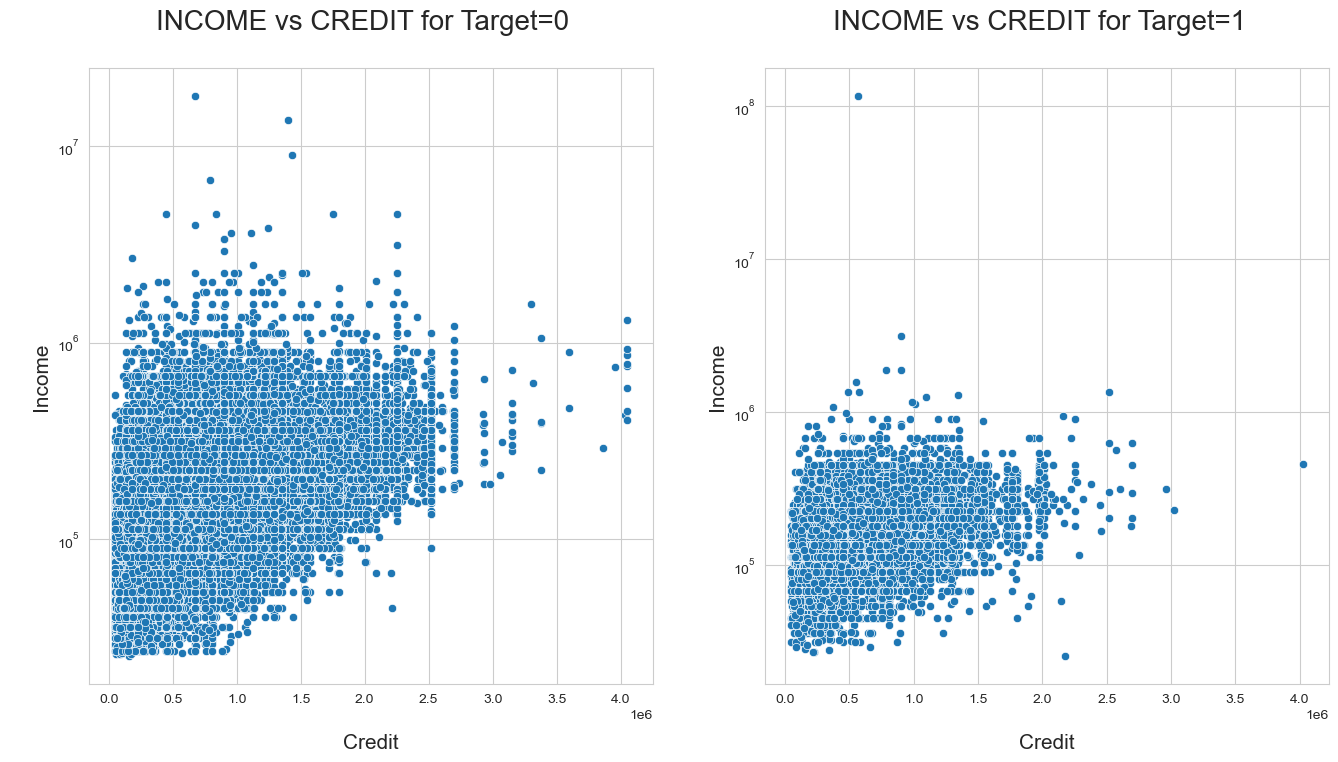

In [59]:
# plotting the scatter plot to find the any correlation and to check the trends in the dataset,in logs
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)

sns.scatterplot(target_0.AMT_CREDIT,target_0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target=0  \n',fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit',fontsize=15)
plt.ylabel('\nIncome',fontsize= 15)

plt.subplot(1,2,2)
sns.scatterplot(target_1.AMT_CREDIT,target_1.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target=1  \n',fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit',fontsize=15)
plt.ylabel('\nIncome',fontsize= 15)
plt.show()



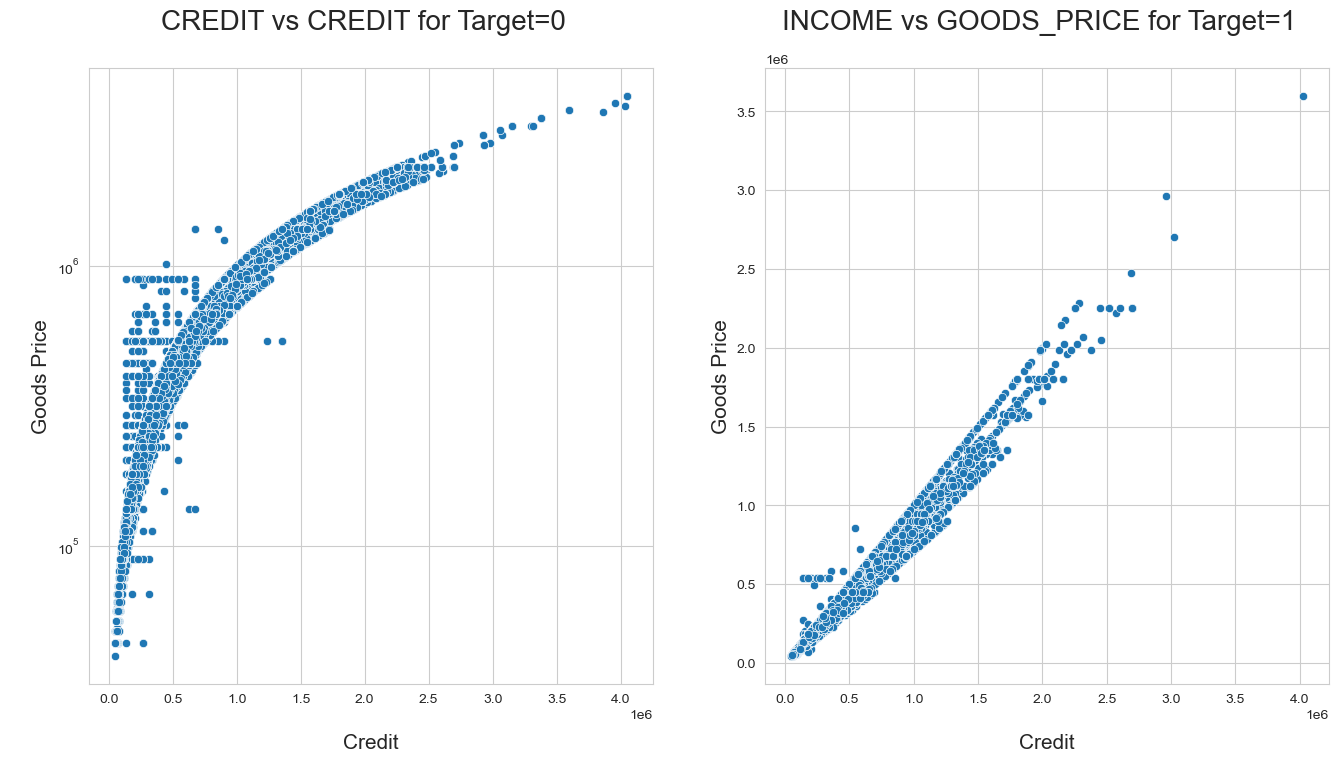

In [60]:
# plotting the scatterplot and find any correlation and to check the trends in the dataset
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)

sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_0)
plt.title('CREDIT vs CREDIT for Target=0  \n',fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit',fontsize=15)
plt.ylabel('\nGoods Price',fontsize= 15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_1)
plt.title('INCOME vs GOODS_PRICE for Target=1  \n',fontsize=20)
plt.xlabel('\nCredit',fontsize=15)
plt.ylabel('\nGoods Price',fontsize= 15)
plt.show()


# Conclusion:
#### 1) From the scatter plot we can conclude that Goods price and credit has direct correlation i.e if the Goods price increases the credit also increases

# Finding Outliers

## univariate Analysis

##### For Target=0

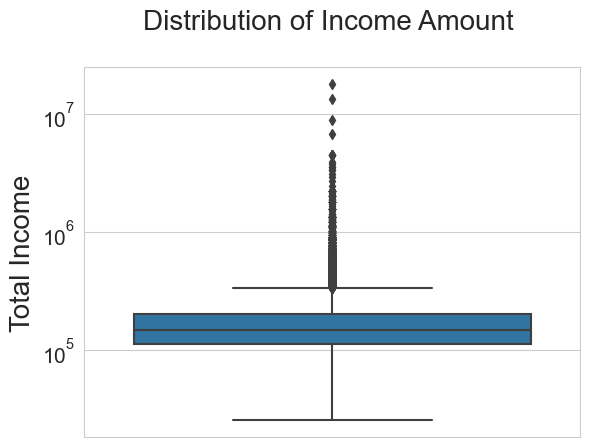

In [61]:
# Distribution of Income Amount

sns.set_style('whitegrid')
sns.boxplot(data=target_0,y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)
plt.show()

# Conclusion:
##### a)There seems to be equal distribution of income amount of the clients
##### b) There are some outliers in the data set

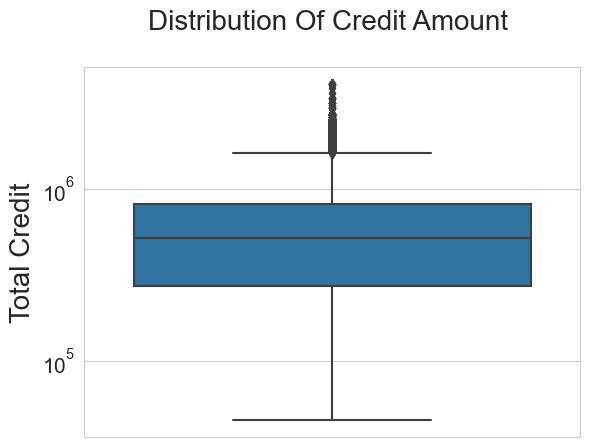

In [62]:
# distribution of credit amount
sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit',fontsize=20)
plt.title('Distribution Of Credit Amount \n',fontsize=20)
plt.show()

# Conclusion:
#### 1) The First quartile is bigger than the Third quartile means most of the client credit lies in the first quartile
#### 2) There seems to be some outliers lies in the credit boxplot

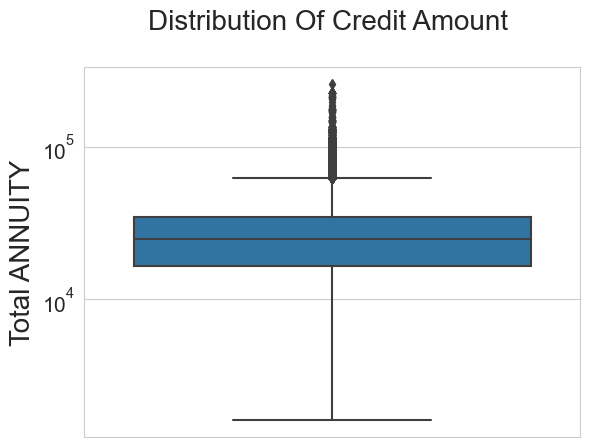

In [63]:
# Distribution of Annuity
sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total ANNUITY',fontsize=20)
plt.title('Distribution Of Credit Amount \n',fontsize=20)
plt.show()


# CONCLUSION:
#### 1) The first quarter is bigger than the third
#### 2) There seems to have some outliers in the Annuity boxplot


# Byvariate Analysis
### Target =0

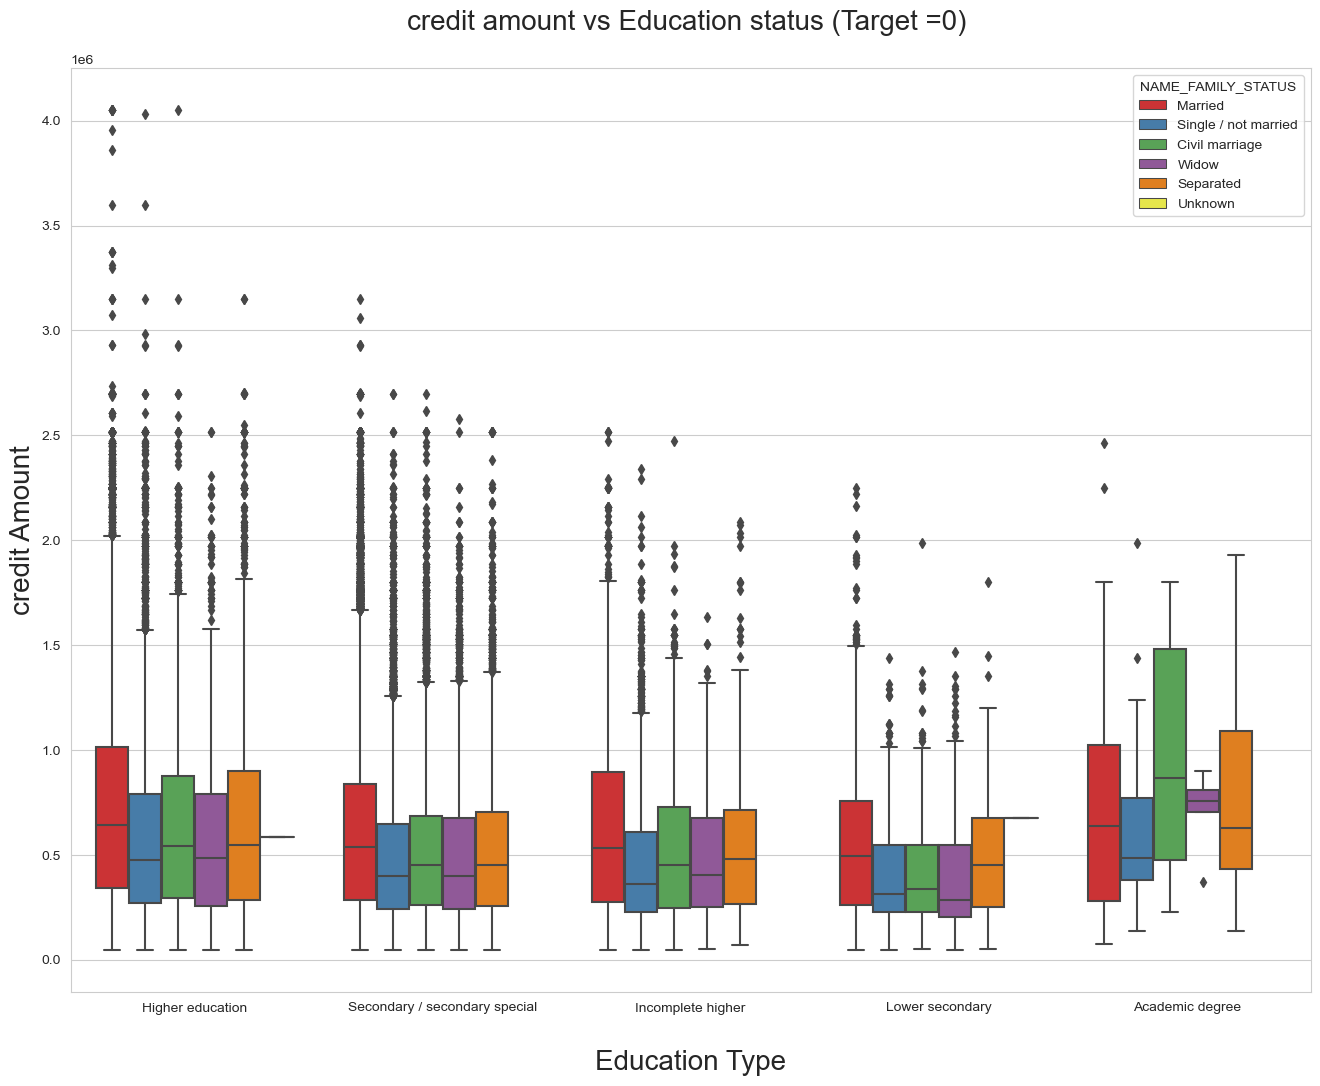

In [64]:
# Box plotting for the Target=0,credit Amount
plt.figure(figsize=[16,12])
sns.boxplot(data=target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue ='NAME_FAMILY_STATUS',orient='v',palette='Set1' )
plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('credit Amount',fontsize=20)
plt.title('credit amount vs Education status (Target =0) \n', fontsize =20)
plt.show()

# Conclusion 
#### 1)Family status of 'civil marriage’,'marriage' and separated' of Academic degree education are having higher number of credits than others.

#### 2)Higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.

#### 3)Civil marriage for Academic degree is having highest of the credits in the third quartile.


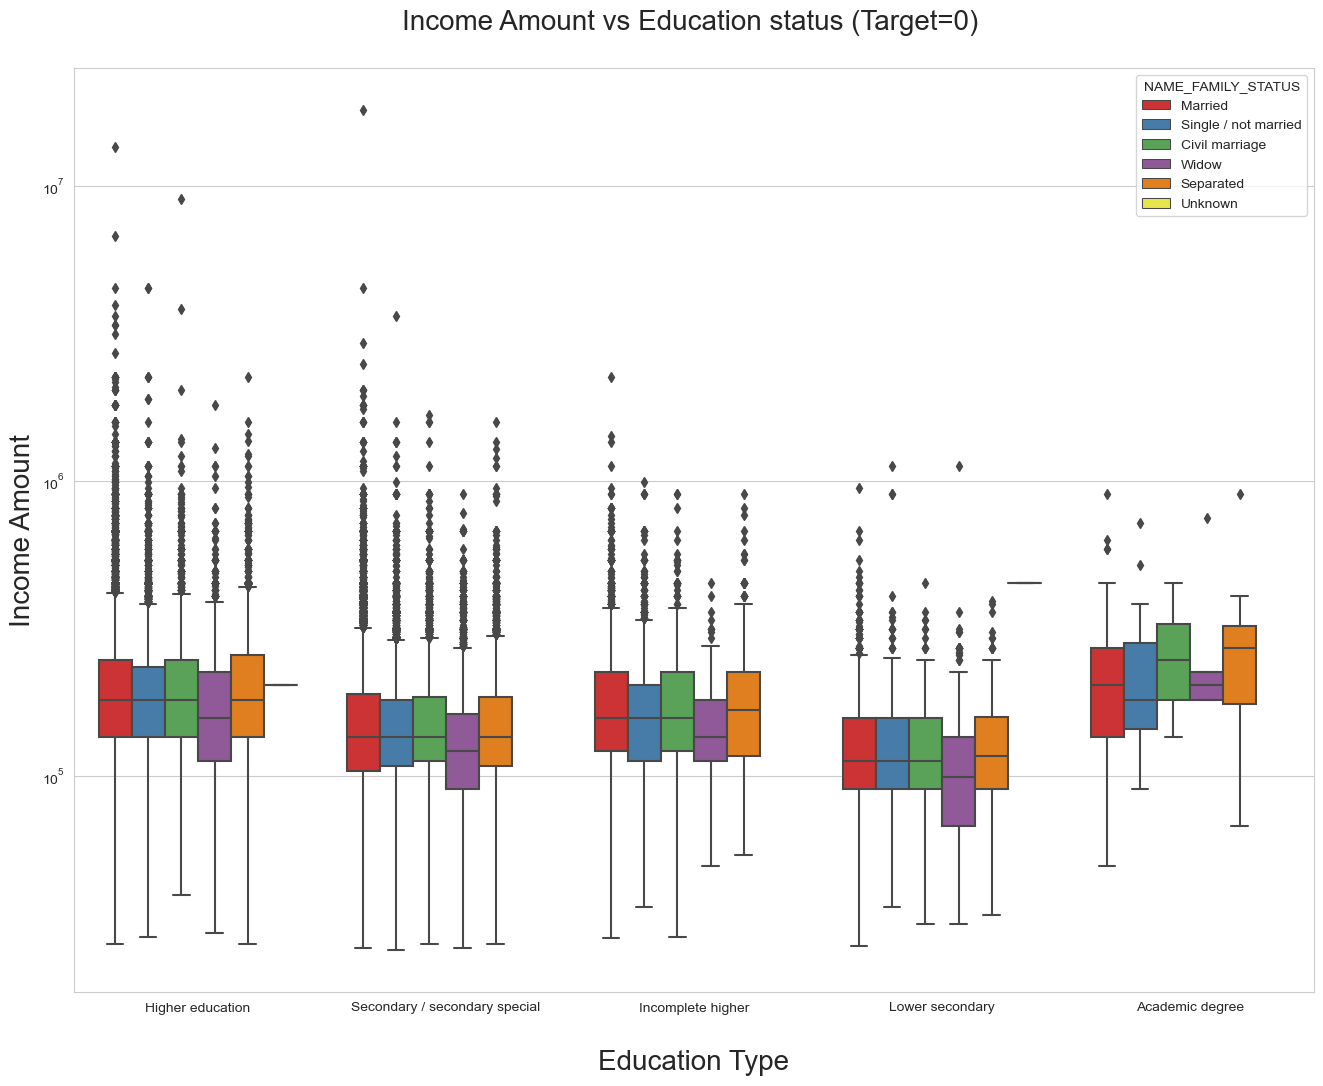

In [65]:
# box plotting for the Target = 0 , Income Amount
plt.figure(figsize=[16,12])
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS', orient='v',palette='Set1')
plt.xticks(rotation=0)
plt.xlabel('\nEducation Type',fontsize=20)
plt.ylabel('Income Amount',fontsize=20)
plt.yscale('log')
plt.title('Income Amount vs Education status (Target=0) \n', fontsize= 20)
plt.show()


## Income amount vs Education Status

#### 2) For Education 'Higher education' the income amount mean is mostly equal with family status. It does contain many outliers.

#### 3) Less outlier are having for Academic degree but they are having their income amount is l higher than that of Higher education.

#### 4) Lower secondary of civil marriage family status are have less income amount than others


 ## Bivariate Analysis for Target = 1

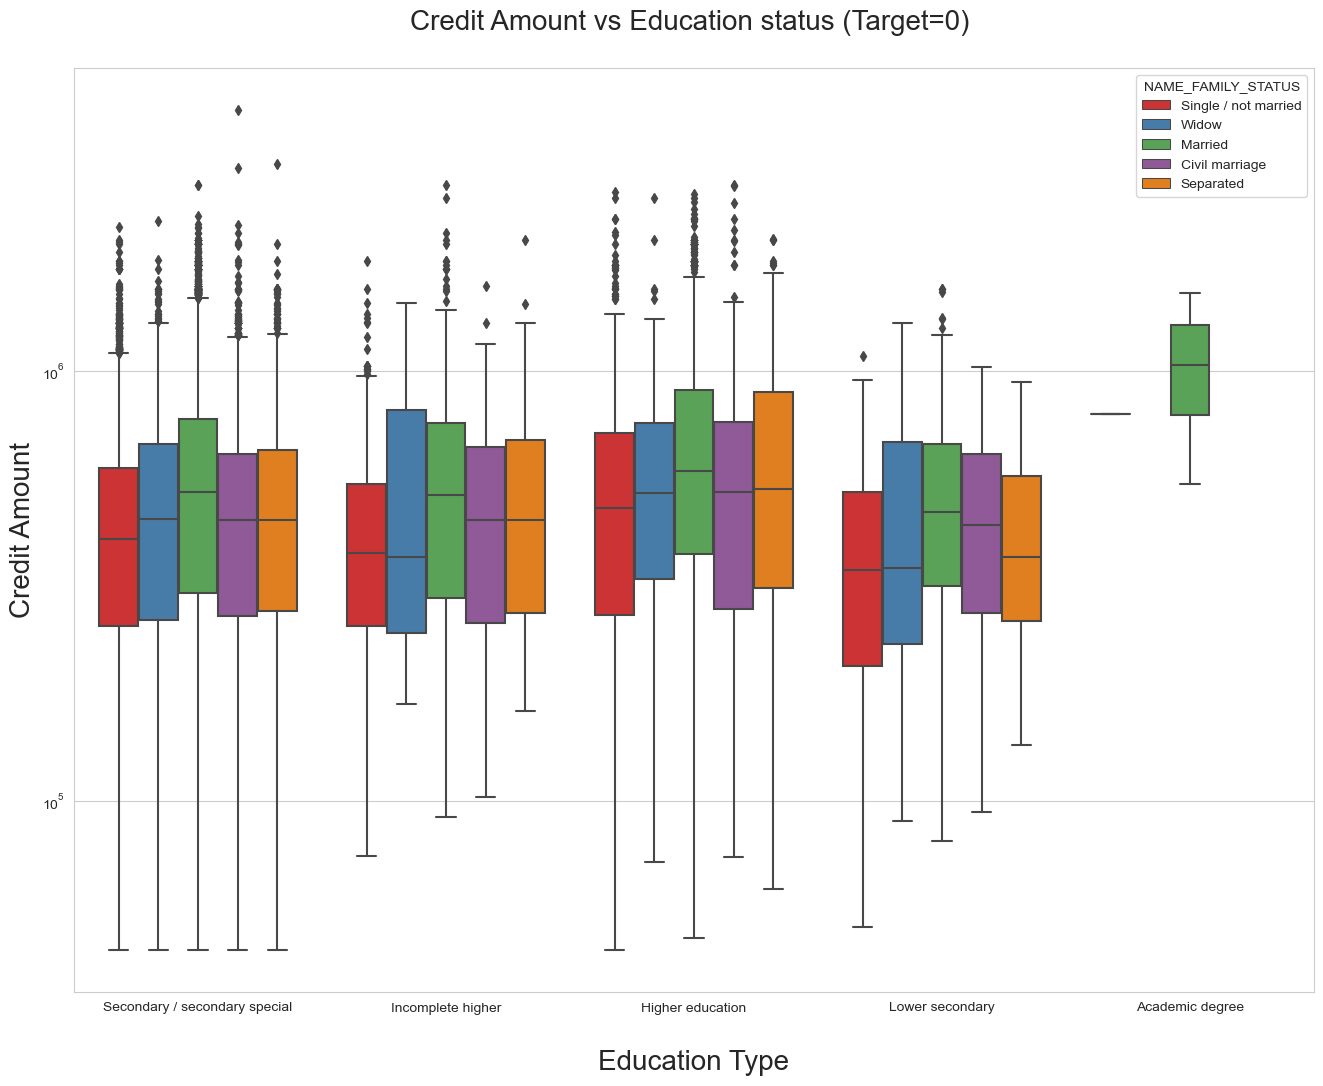

In [66]:
# Box plotting for Target = 1 , credit Amount
plt.figure(figsize=[16,12])
sns.boxplot(data=target_1, x='NAME_EDUCATION_TYPE',y ='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v',palette='Set1')
plt.xticks(rotation=0)
plt.xlabel('\nEducation Type',fontsize=20)
plt.ylabel('Credit Amount',fontsize=20)
plt.yscale('log')
plt.title('Credit Amount vs Education status (Target=0) \n', fontsize= 20)
plt.show()

# Conclusion:
### Credit amount vs Education Status

### 1)Quite similar from Target 0, we can say that Family status of 'civil marriage', 'marriage' and 'separated' of     Academic degree education are having higher number of credits than others.

### 2) Most of the outliers are from Education 'Higher education' and 'Secondary’.

### 3) married for Academic degree is having most of the credits in the third quartile


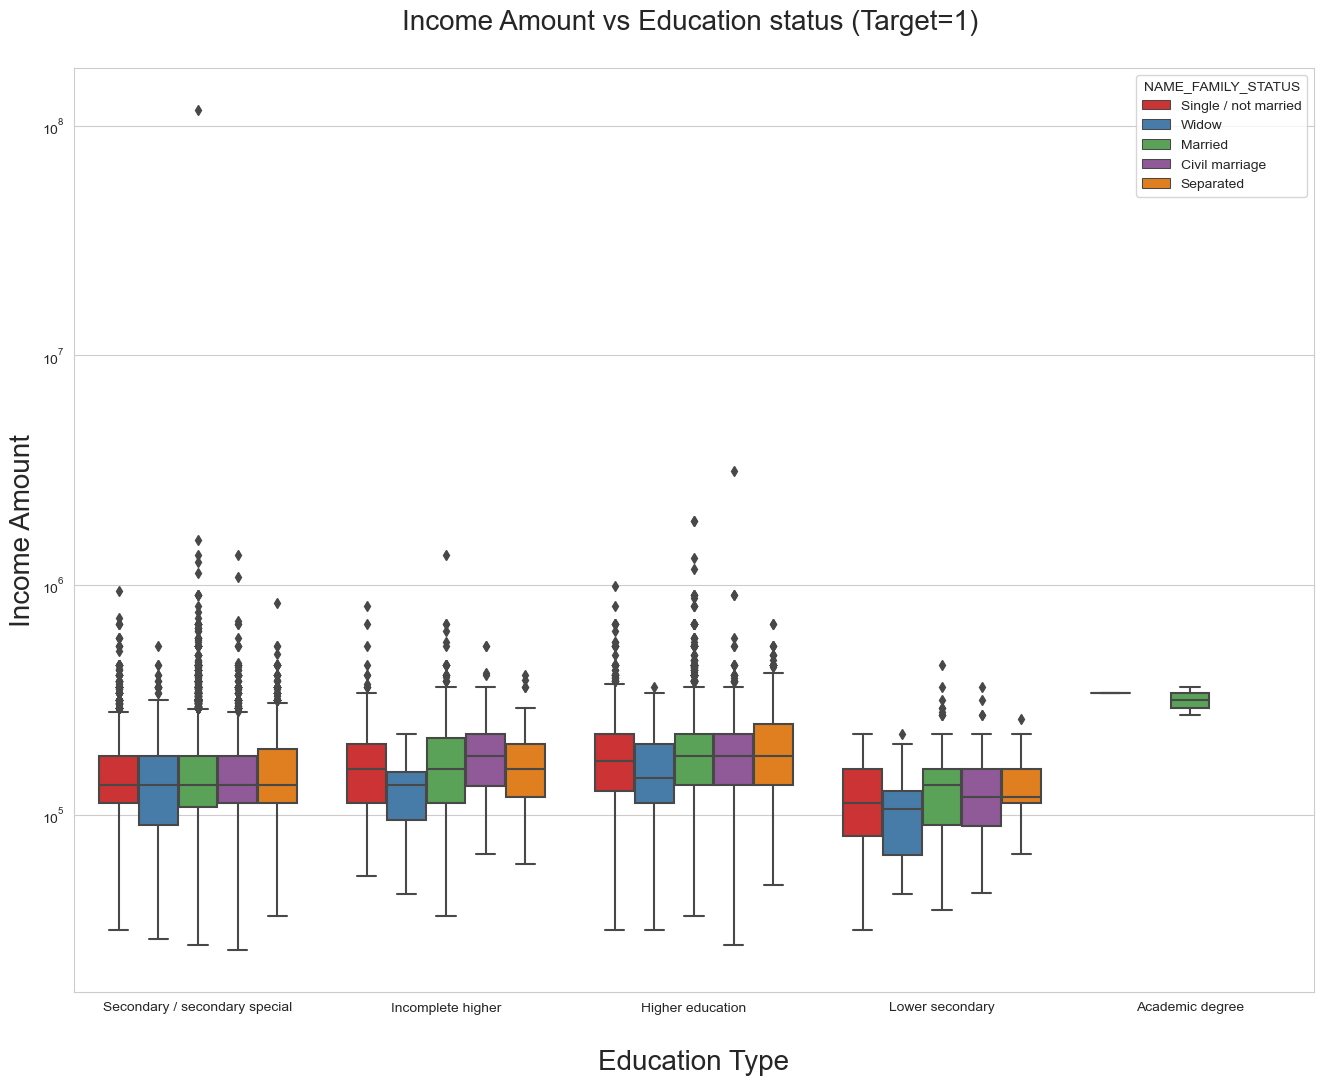

In [67]:
## Box plotting for Target = 1 , Income Amount
plt.figure(figsize=[16,12])
sns.boxplot(data=target_1, x='NAME_EDUCATION_TYPE',y ='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v',palette='Set1')
plt.xticks(rotation=0)
plt.xlabel('\nEducation Type',fontsize=20)
plt.ylabel('Income Amount',fontsize=20)
plt.yscale('log')
plt.title('Income Amount vs Education status (Target=1) \n', fontsize= 20)
plt.show()

# Conclusion


#### 1)some similarity with Target, From the boxplot for Education type 'Higher education' the income amount is mostly equal with family status.

#### 2)Less outlier are having for Academic degree but their income amount is little higher than Higher education.

#### 3) Lower secondary have less income amount than others


# Work On Previous_application dataset


In [68]:
# Reading The dataset
previous_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# checking for the null values again in the dataset

round((100*previous_app_df.isnull().sum()/len(previous_app_df)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [70]:
# checking NAME_CASH_PURPOSE column for unique data
previous_app_df.NAME_CASH_LOAN_PURPOSE.value_counts()


XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [71]:
#Removing the 'XNA' and ' XAP' Values from the column
previous_app_df=previous_app_df.drop(previous_app_df[previous_app_df.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
previous_app_df=previous_app_df.drop(previous_app_df[previous_app_df.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [72]:
# Rechecking NAME_CASH_PURPOSE column for unique data
previous_app_df.NAME_CASH_LOAN_PURPOSE.value_counts()


Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

# Merging The Two Dataset i.e Application dataset and Previous_application dataset

In [73]:
# Merging datasets
loan_merg=pd.merge(left=application_df , right= previous_app_df, how = 'inner', on = 'SK_ID_CURR', suffixes='_x')
loan_merg.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799,-3015,1.0,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,75000-100000,150000-200000,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266,-3787,2.0,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,275000-300000,650000-700000,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557,-3557,3.0,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1,350000-375000,700000-750000,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,175000-200000,500000-550000,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House 

In [74]:
#Renaming the columns in the loan_merge_dataset
loan_merg=loan_merg.rename({'NAME_CONTRACT_TYPE_':'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':"AMT_ANNUITY",
                             'WEEKDAY_APPR_PROCESS_START_':'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START',
                             'NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV','AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                             'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'},axis=1)

In [75]:

loan_merg.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION'
                , 'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY' ],axis=1, inplace=True)

# Performing The Univariate Analysis

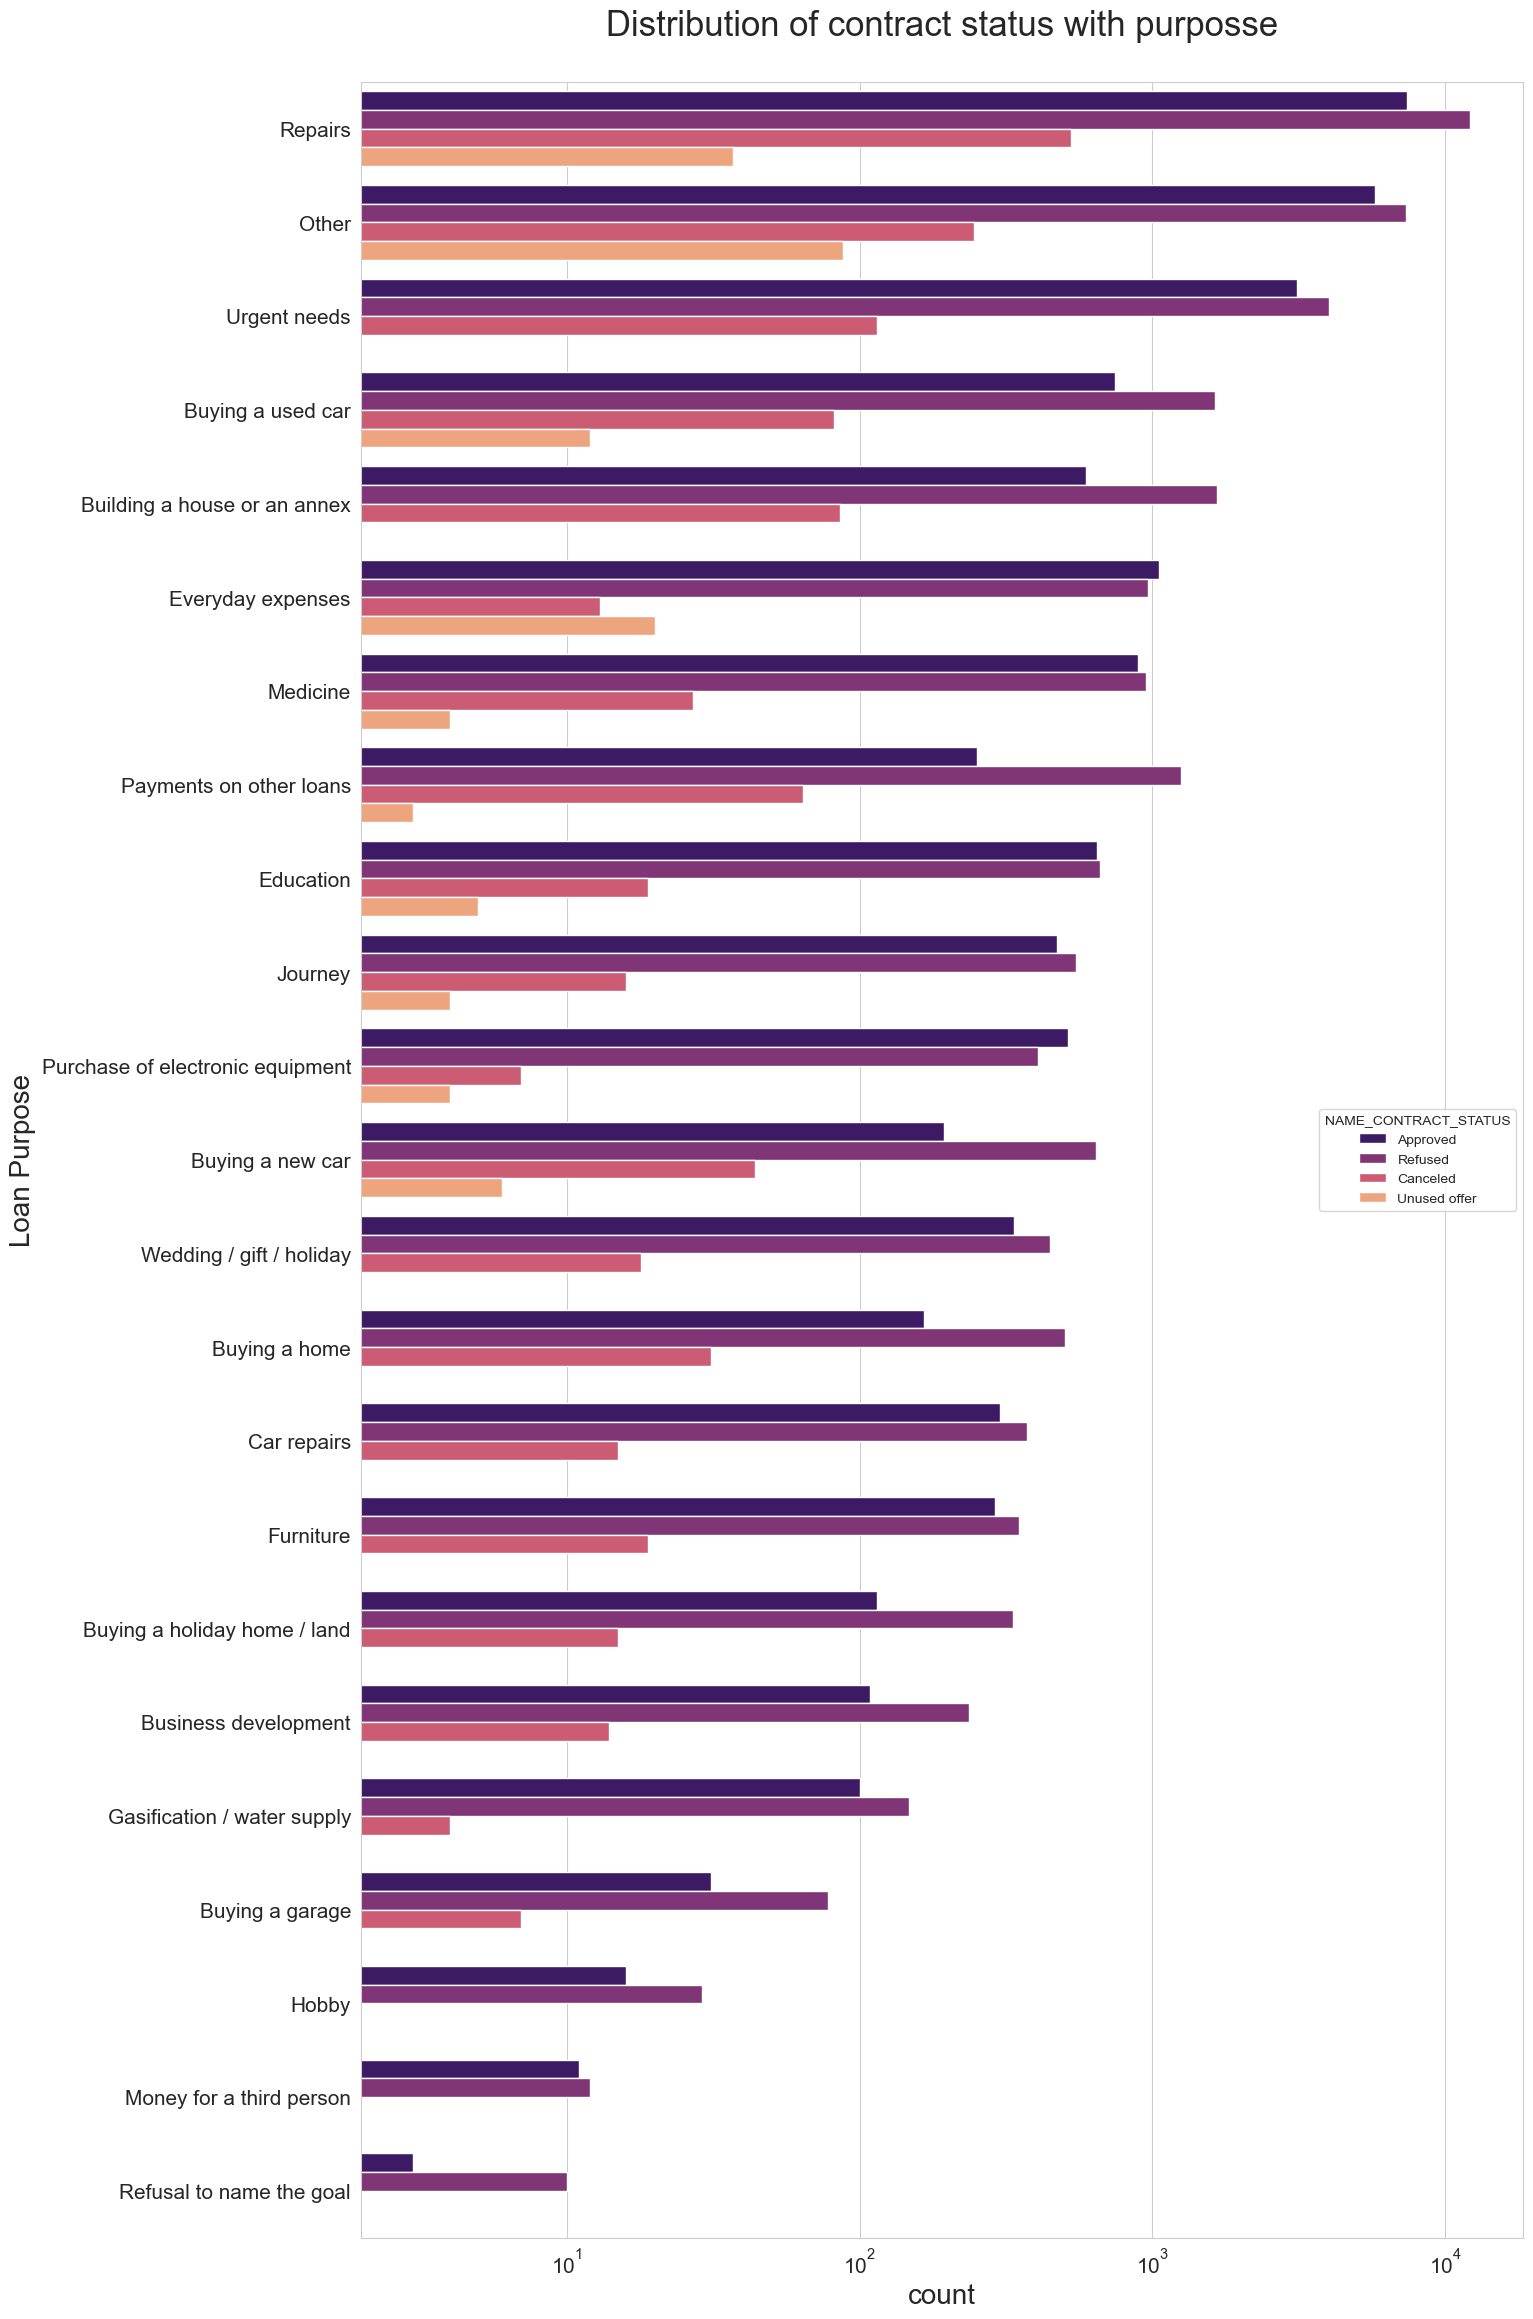

In [76]:
#plotting the contract status

plt.figure(figsize=[15,28])
sns.countplot(data= loan_merg, y='NAME_CASH_LOAN_PURPOSE',order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='NAME_CONTRACT_STATUS',palette='magma')
plt.title('Distribution of contract status with purposse\n', fontsize= 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('count',fontsize=20)
plt.ylabel('Loan Purpose',fontsize=20)
plt.xscale('log')

plt.show()


# Conclusion
#### 1) Most loan rejection came from 'Repair' purpose.
#### 2) There are equal approves and rejection for ' education' purpose.
#### 3) Paying other loans and buying new car have higher number of rejection.


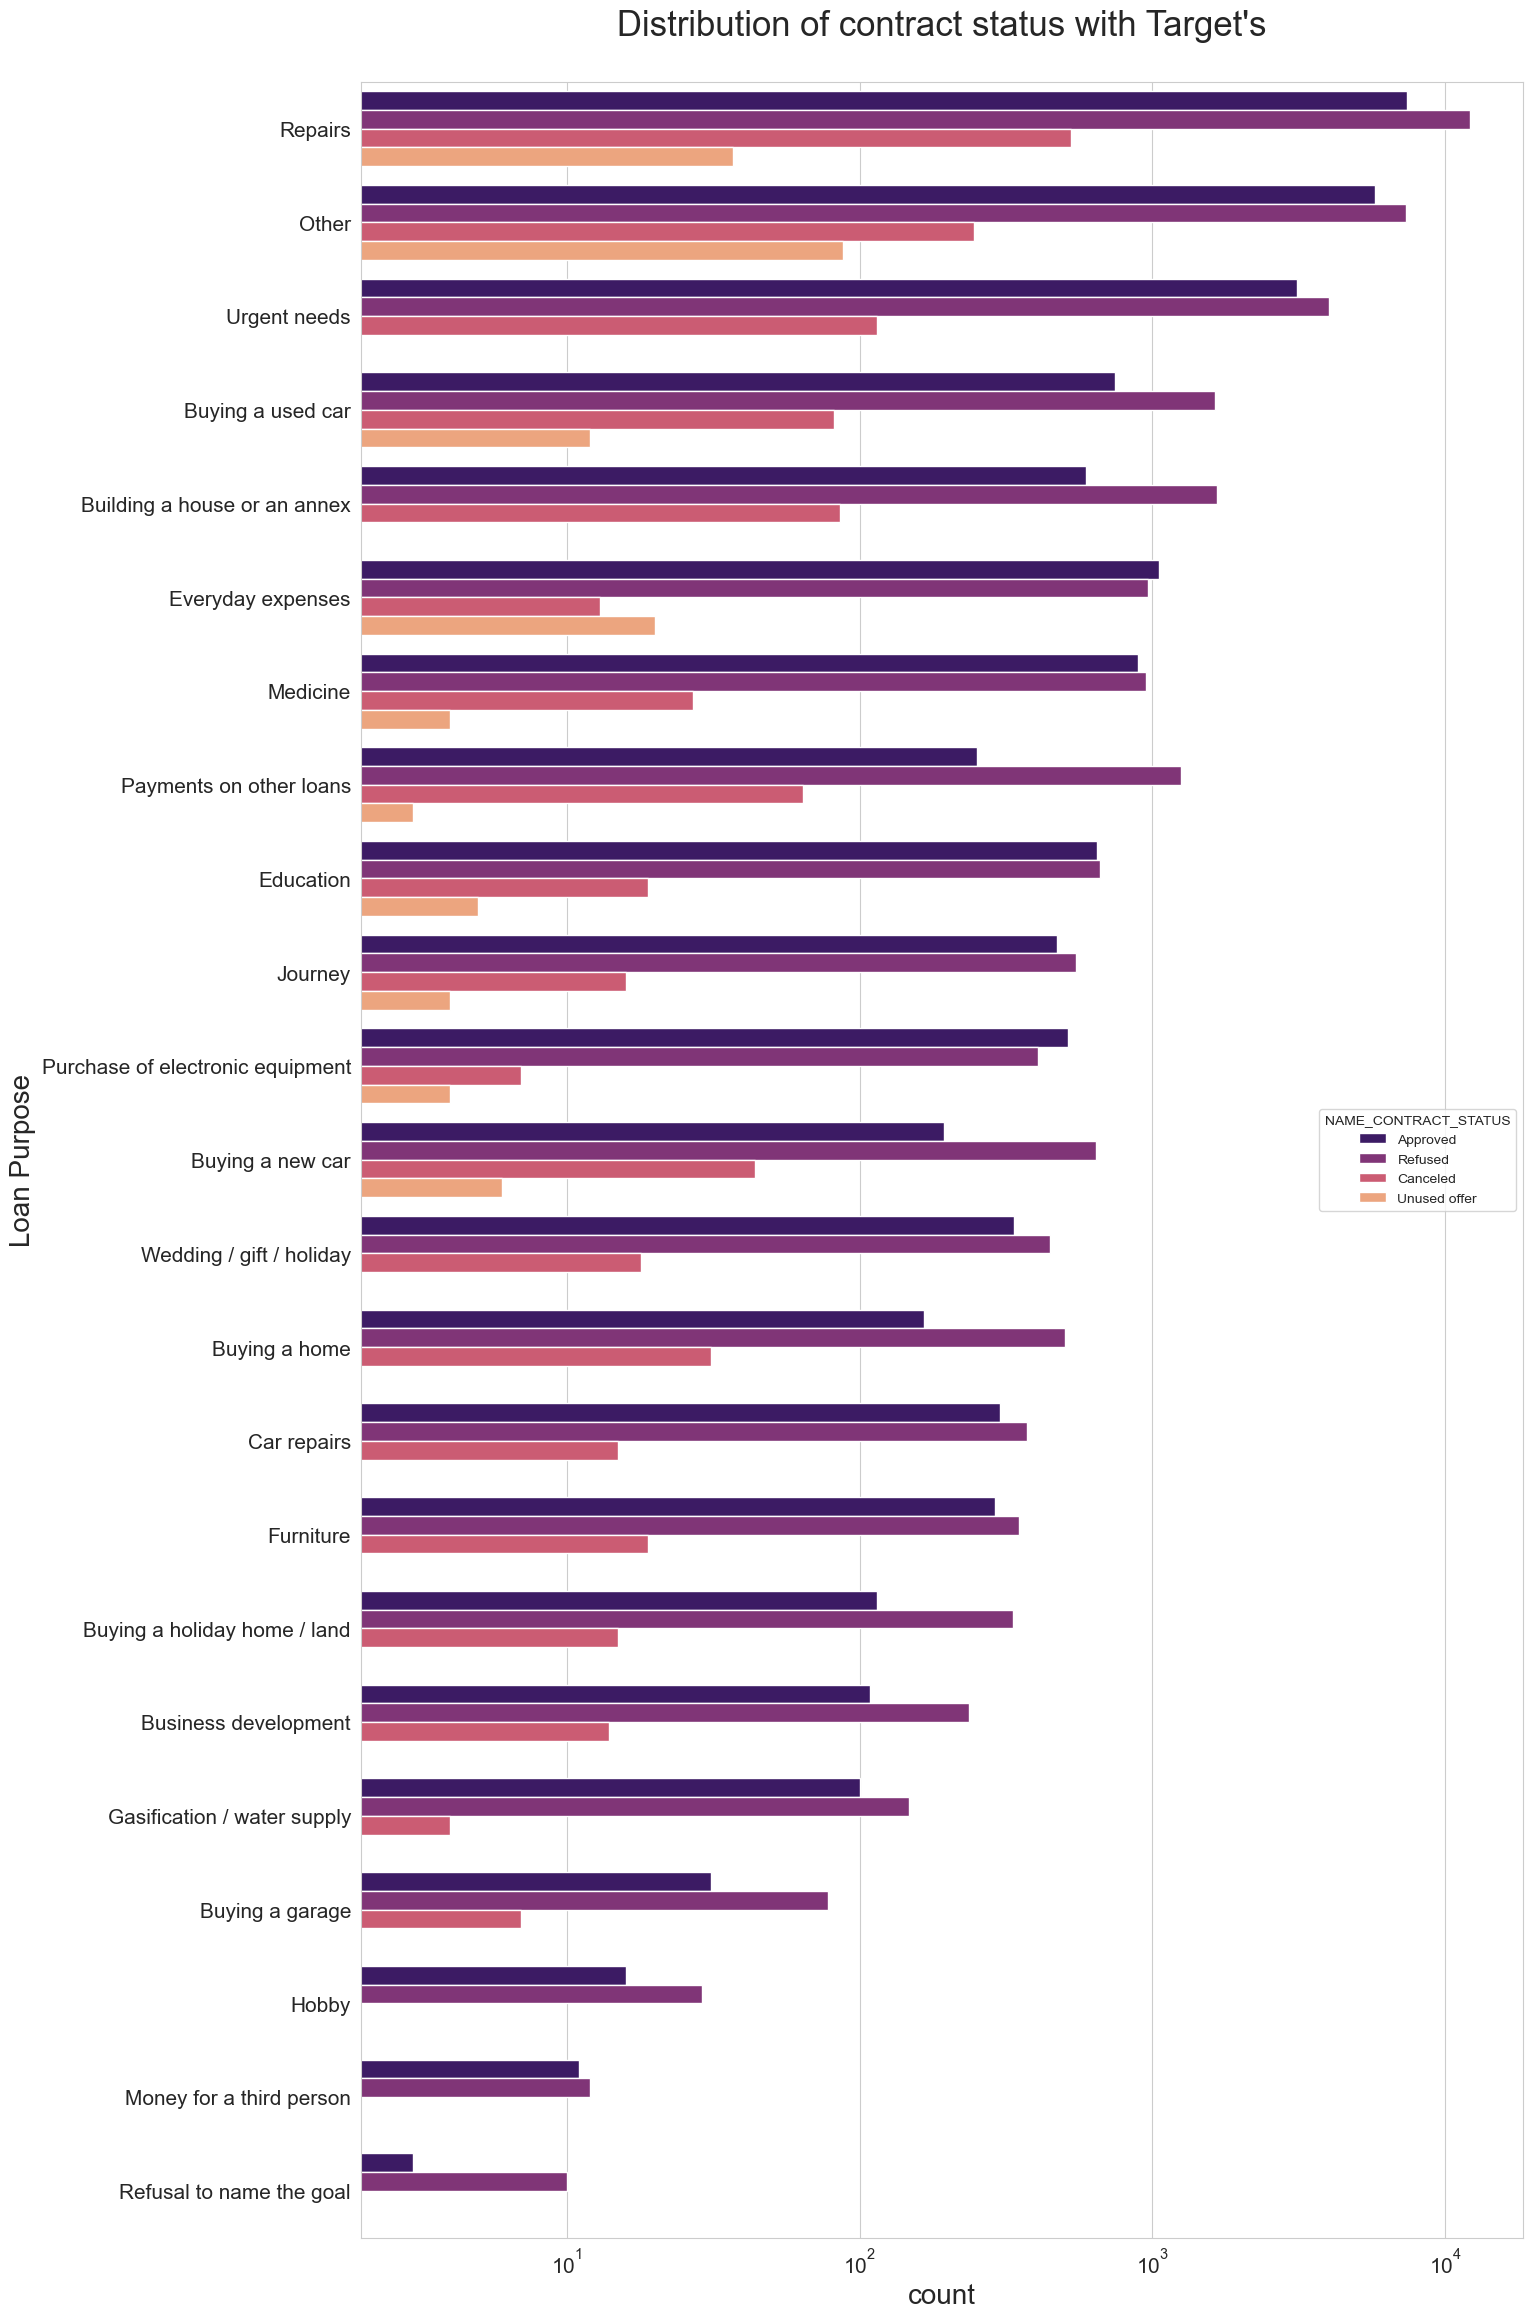

In [77]:
#plotting for the contract status


plt.figure(figsize=[15,28])
sns.countplot(data= loan_merg, y='NAME_CASH_LOAN_PURPOSE',order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='NAME_CONTRACT_STATUS',palette='magma')
plt.title('Distribution of contract status with Target\'s\n', fontsize= 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('count',fontsize=20)
plt.ylabel('Loan Purpose',fontsize=20)
plt.xscale('log')

plt.show()

# Conclusion:
#### 1) loan purpose with 'Repairs'  is facing more difficulties in payment on time
#### 2) There are some places where loan payment is facing higher than significant diffcuilties these are 'Buying agarage','Business                      Developement','Buying land','Buying new car',and 'Education' hense we can focus on these purpose where clients are facing                    difficulties in repayment

# Performing Bivariate Analysis

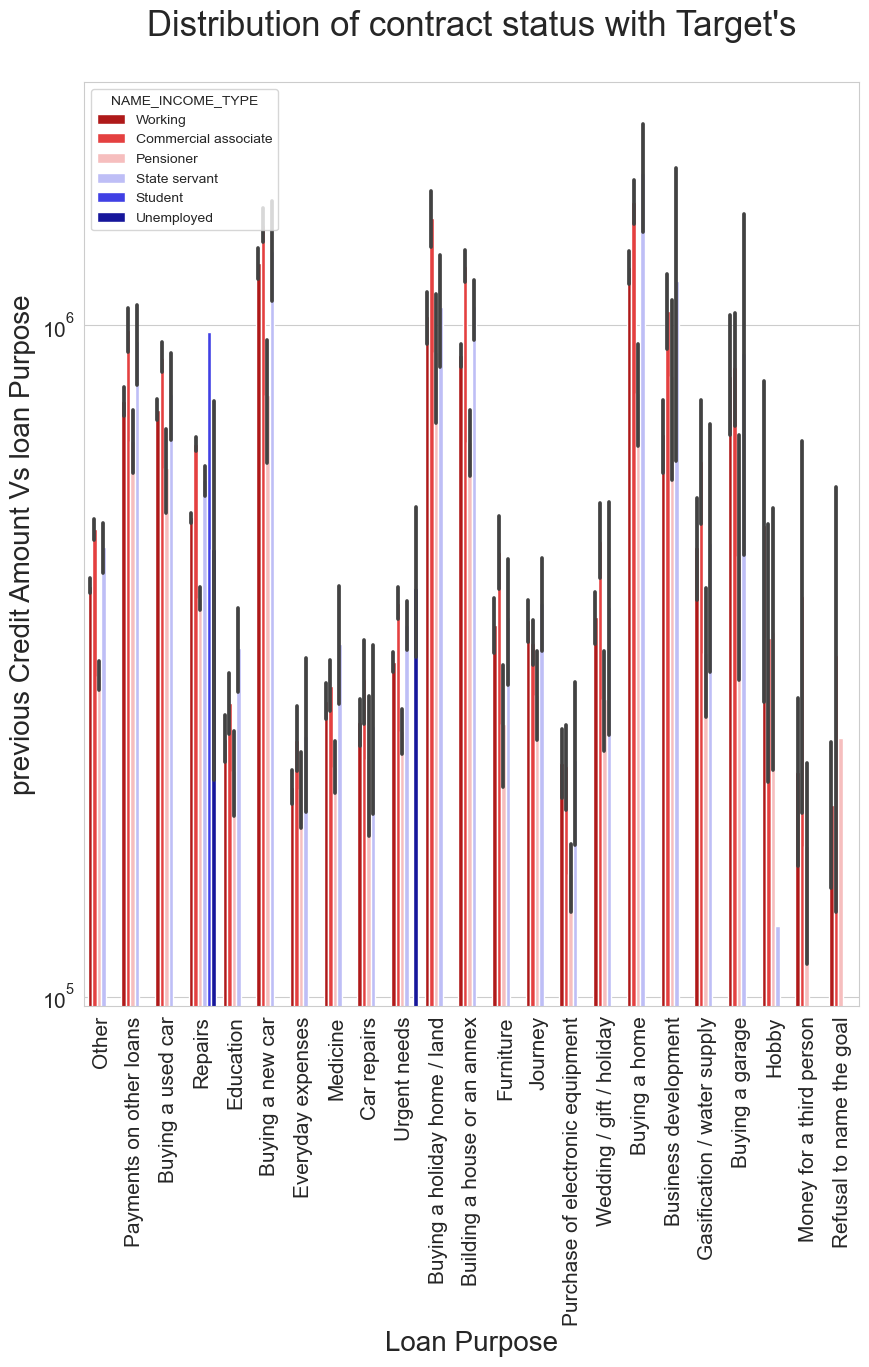

In [100]:
# Plotting for credit amount logarthemetic scale
plt.figure(figsize=[10,12])
sns.barplot(data= loan_merg, x='NAME_CASH_LOAN_PURPOSE', y='AMT_CREDIT_PREV',hue='NAME_INCOME_TYPE',orient='v',palette='seismic_r')
plt.title('Distribution of contract status with Target\'s\n', fontsize= 25)
plt.xticks(rotation=90)
plt.ylabel('Amount_CrediT_Prev',fontsize=20)
plt.xlabel('Loan Purpose',fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel('previous Credit Amount Vs loan Purpose')


plt.show()


# Conclusion:
#### 1) Credit Amount of Loan purpose like Buying land','Buying new car, and 'Building a house' is higher 
#### 2) Income type of state servant  have more credit applied
#### 3)Hobby and money for third person have less credit amount

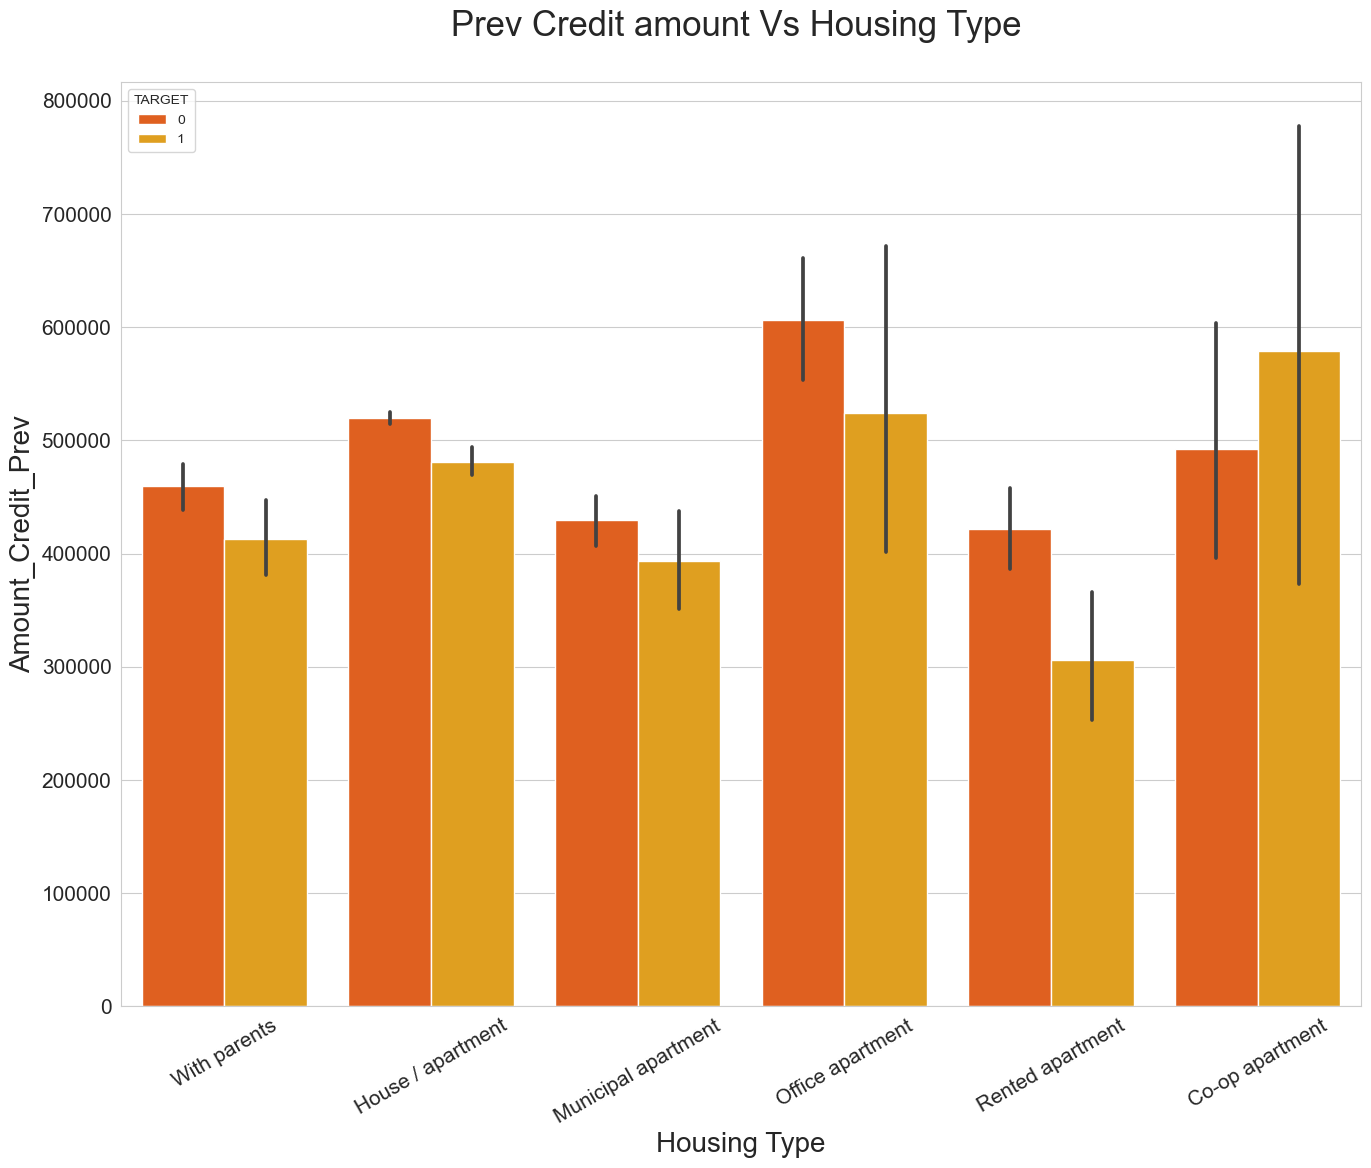

In [79]:
# Plotting for credit amount prev vs Housing Type
plt.figure(figsize=[16,12])
sns.barplot(data= loan_merg, x='NAME_HOUSING_TYPE', y='AMT_CREDIT_PREV',hue='TARGET',palette='autumn')
plt.title('Prev Credit amount Vs Housing Type \n', fontsize= 25)
plt.xticks(rotation=30)
plt.ylabel('Amount_Credit_Prev',fontsize=20)
plt.xlabel('Housing Type',fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)




plt.show()


### Prev Credit amount vs Housing type

#### 1)Housing type, office apartment is having higher credit of target 0 and co-op apartment is having higher credit of target_1.

#### 2)So, we can conclude that bank should avoid loans to the housing type of co-op apartment as they are having failure in payment.

#### 3)Bank can focus on housing type with parents or House\apartment or municipal apartment for successful payments.


# Overall Analysis Of The Loan Data:
#### 1. Bank should approve more loans to the office apartments, co-operative apartment housing type
####     they have less payment difficuilties.

#### 4. Female in income range 450000-475000 is least likely to default the loan

#### 5. Male in income range 475000-500000 is least likely to default the loan

#### 6. In Revolving loans category. male is not very likely to default. Bank can attract with specific
####    offers

#### 7. Clients from Industry type 8,type 6, type 10, religion and trade type 5, type 4 are more likely to
####   default.

#### 8. People with Income type ‘Working’ have most number of unsuccessful payments.

#### 9. Loan purpose type ‘Repair’ is having higher number of late payments


